In [2]:
# Bibliotecas

import yfinance as yf
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from math import sqrt

# Carteira de Fundos de Investimento Imobiliário

A carteira é composta dos fundos mais rentáveis do primeiro semestre de 2023 de acordo com o Estadão e dos fundos presentes em duas carteiras sugeridas pelo Banco do Brasil para setembro de 2023. \
https://einvestidor.estadao.com.br/mercado/fundos-imobiliarios-mais-rentaveis-selic-investimentos/
https://www.bb.com.br/docs/portal/upb/CarteiraFII.pdf


[*********************100%***********************]  1 of 1 completed


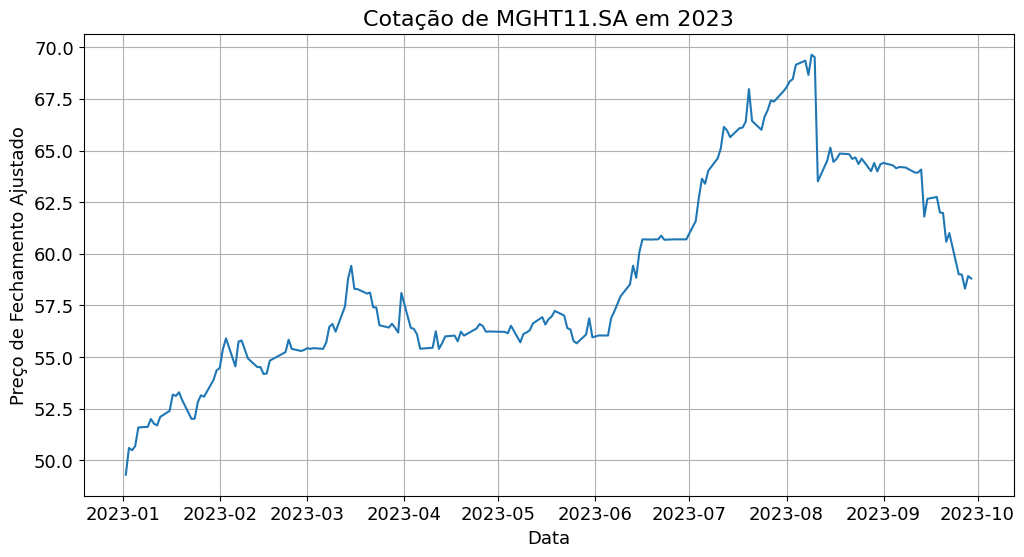

[*********************100%***********************]  1 of 1 completed


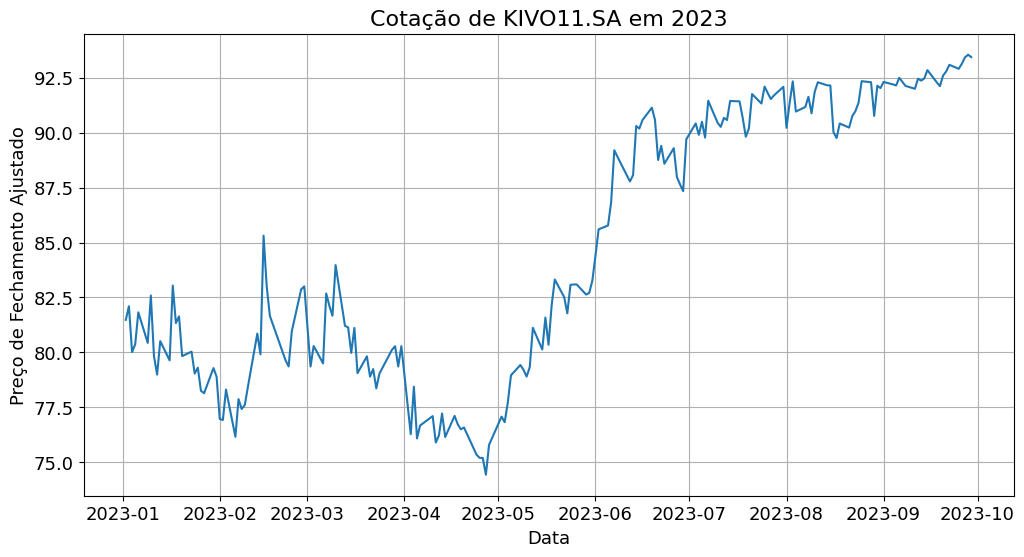

[*********************100%***********************]  1 of 1 completed


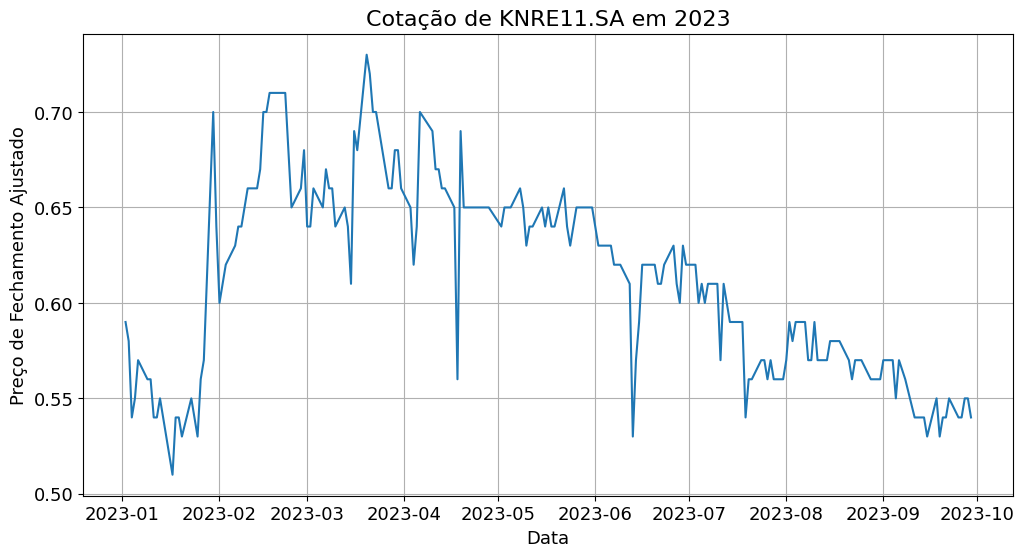

[*********************100%***********************]  1 of 1 completed


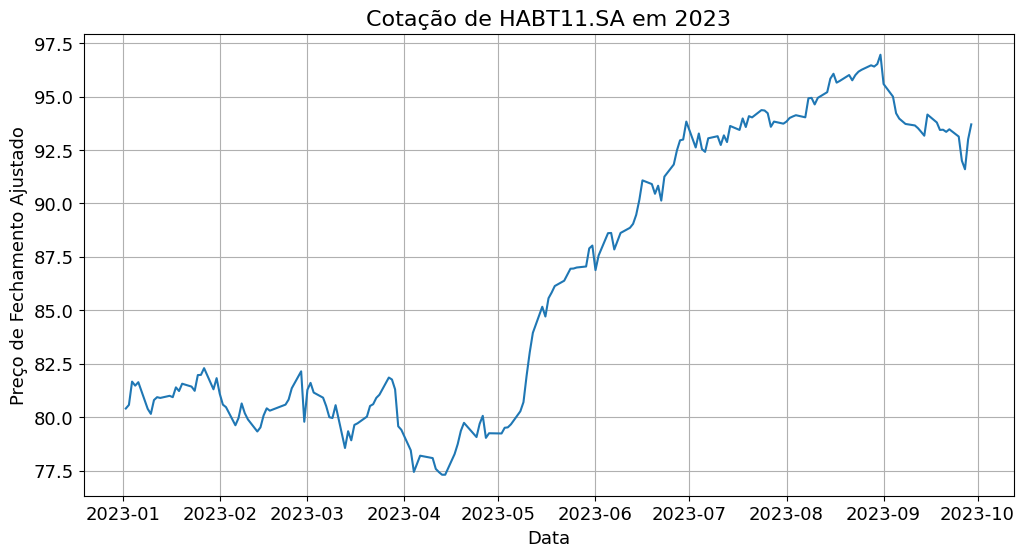

[*********************100%***********************]  1 of 1 completed


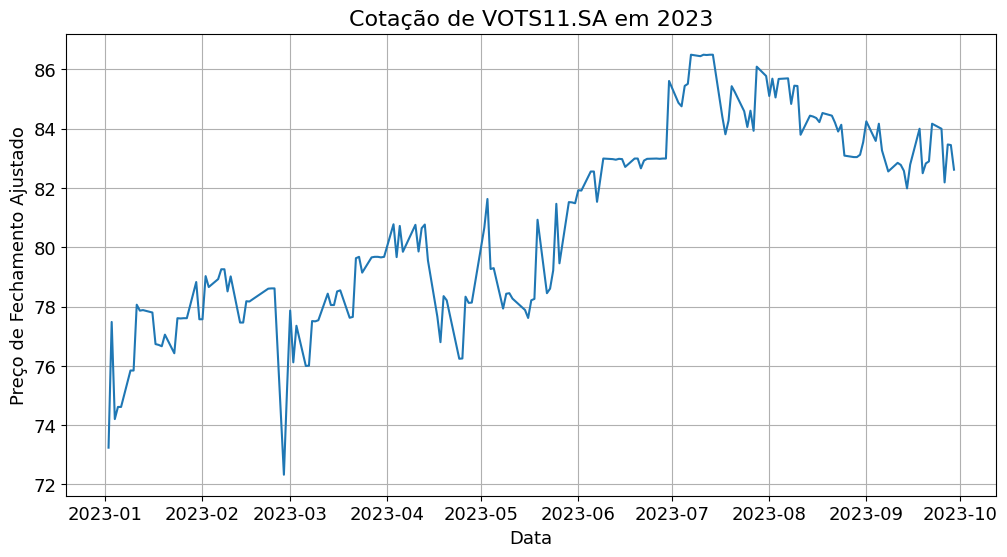

[*********************100%***********************]  1 of 1 completed


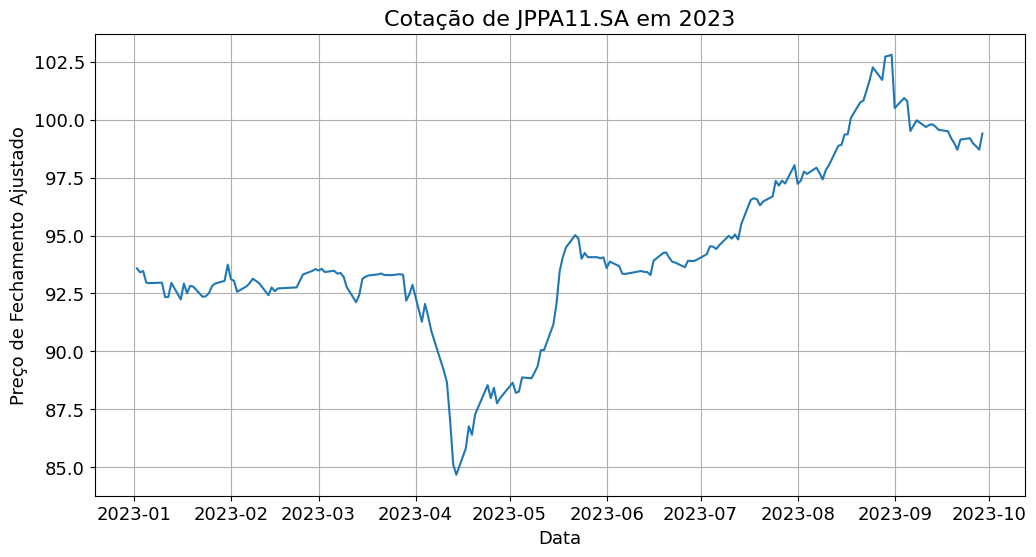

[*********************100%***********************]  1 of 1 completed


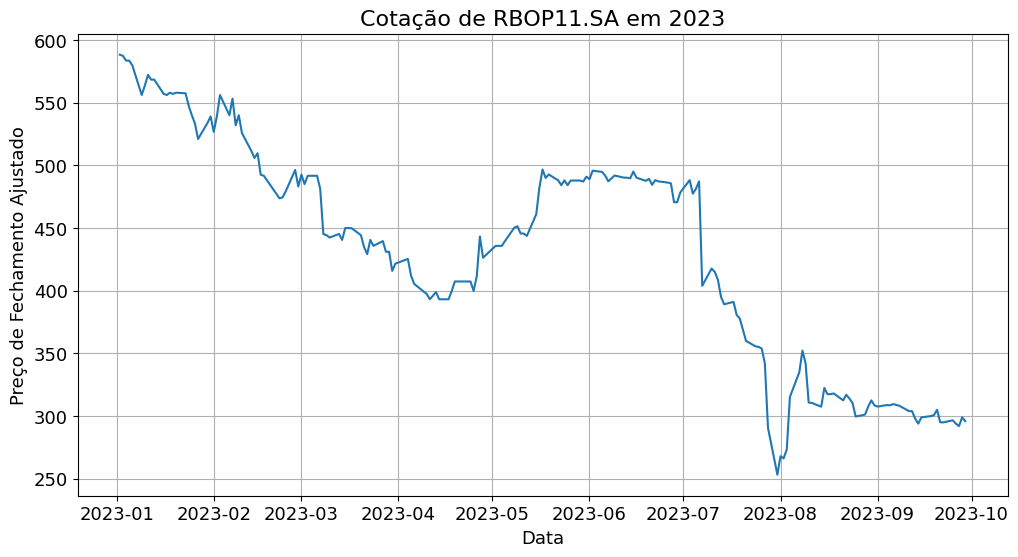

[*********************100%***********************]  1 of 1 completed


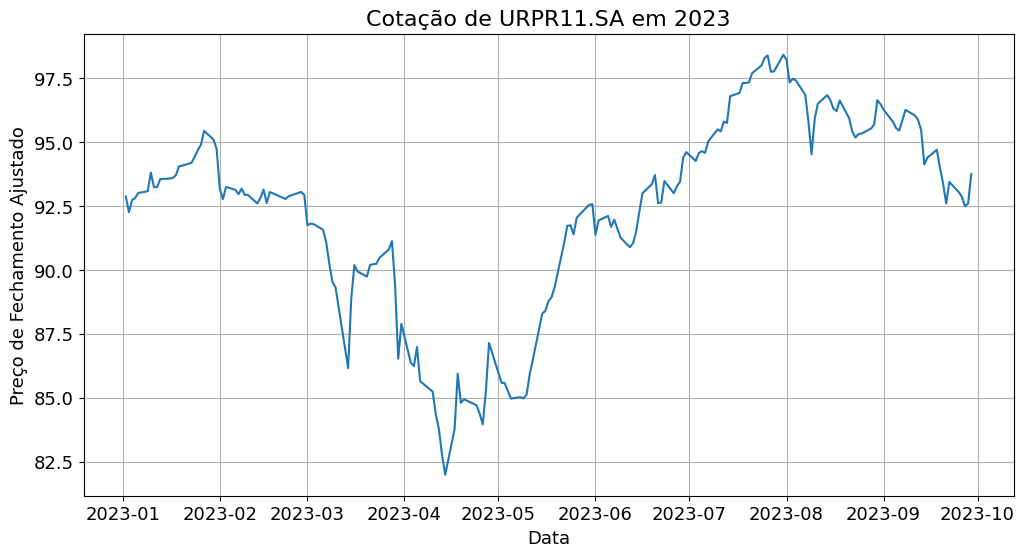

[*********************100%***********************]  1 of 1 completed


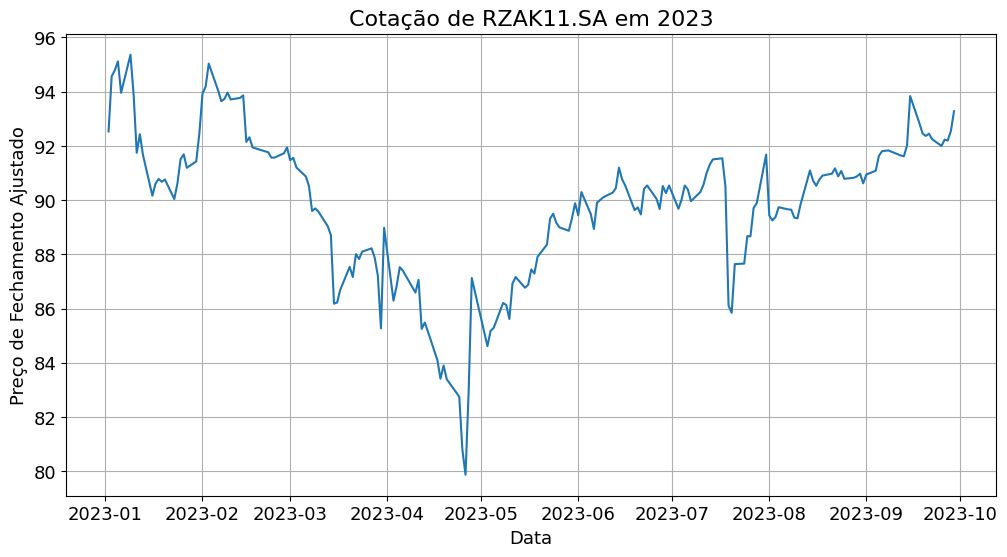

In [3]:
# Fundos mais rentáveis do primeiro semestre de 2023

fii_mais_rentaveis = ['MGHT11.SA', 'KIVO11.SA', 'KNRE11.SA', 'HABT11.SA', 'VOTS11.SA', 'JPPA11.SA', 'RBOP11.SA', 'URPR11.SA', 'RZAK11.SA']

# Cotação do ano de 2023 até o momento
data_inicio = "2023-01-01"
data_fim = "2023-10-02"

# Baixar as cotações dos ativos
for i, ativo in enumerate(fii_mais_rentaveis):
    data = yf.download(ativo, start=data_inicio, end=data_fim)

    plt.figure(figsize=(12, 6))
    plt.plot(data['Adj Close'], label=ativo)
    plt.title(f"Cotação de {ativo} em 2023", fontsize=16)
    plt.xlabel("Data",fontsize=13)
    plt.ylabel("Preço de Fechamento Ajustado", fontsize=13)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.grid(True)
    plt.show()



[*********************100%***********************]  1 of 1 completed


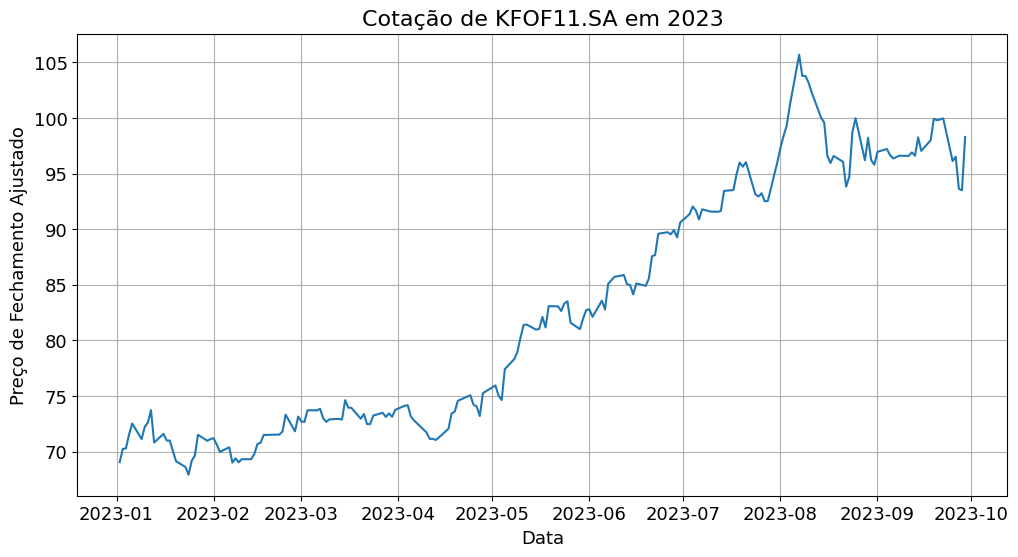

[*********************100%***********************]  1 of 1 completed


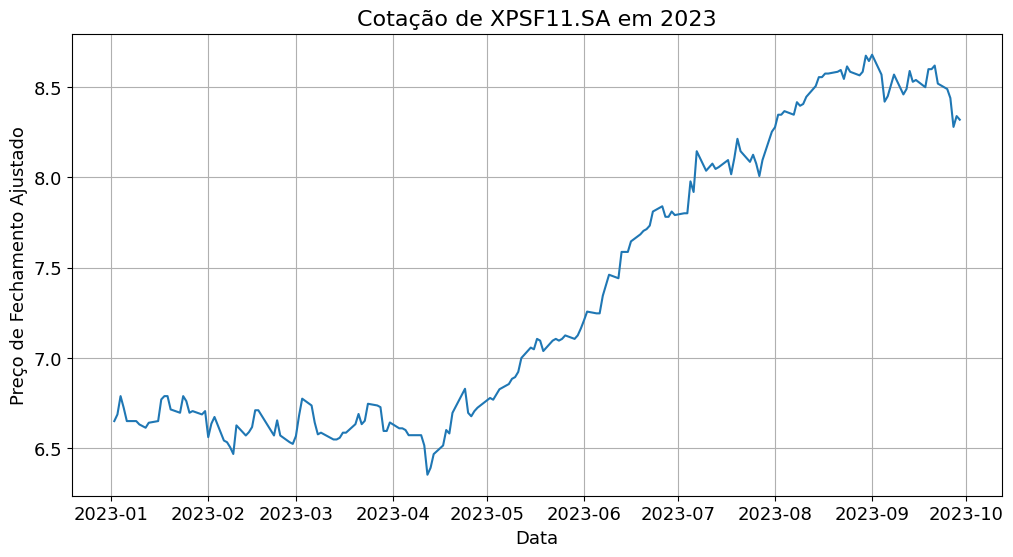

[*********************100%***********************]  1 of 1 completed


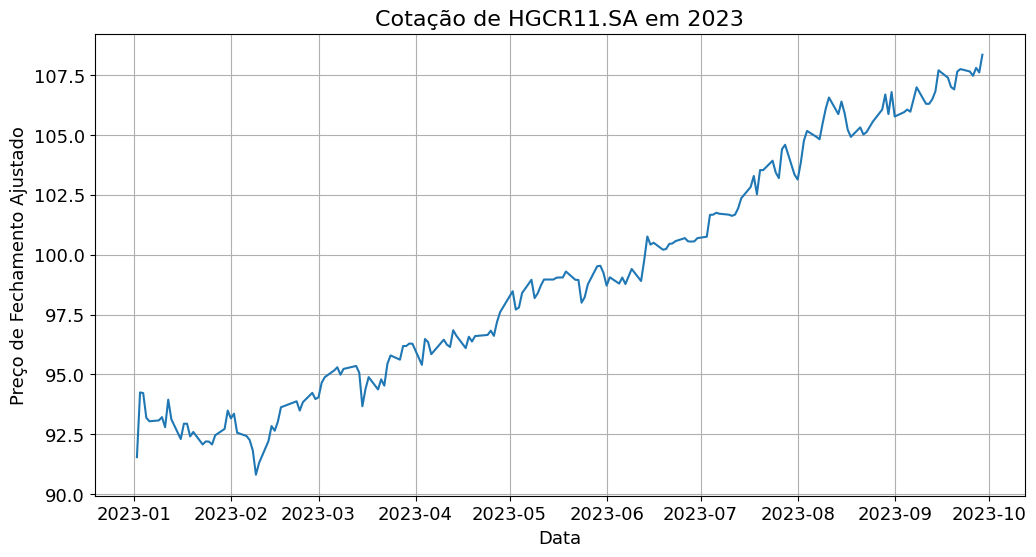

[*********************100%***********************]  1 of 1 completed


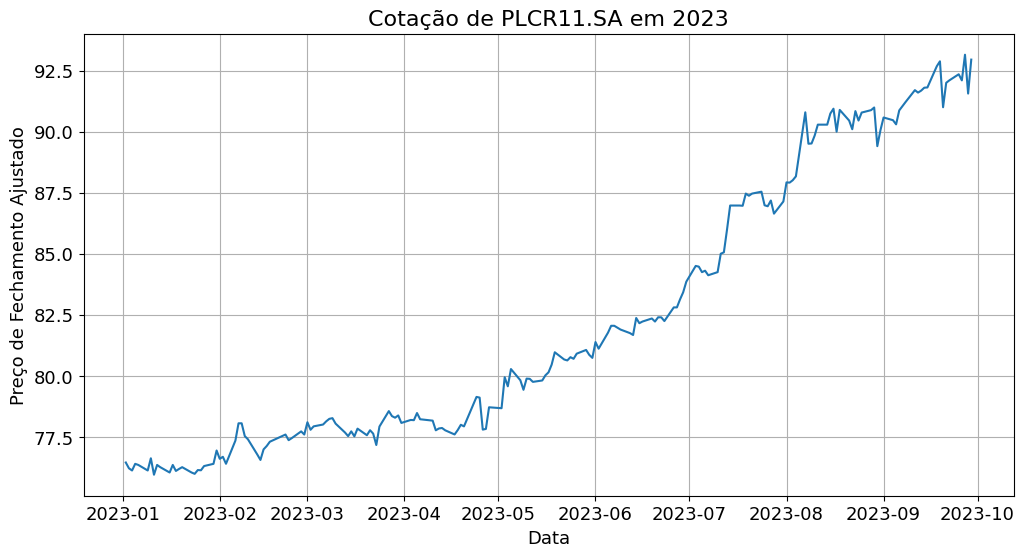

[*********************100%***********************]  1 of 1 completed


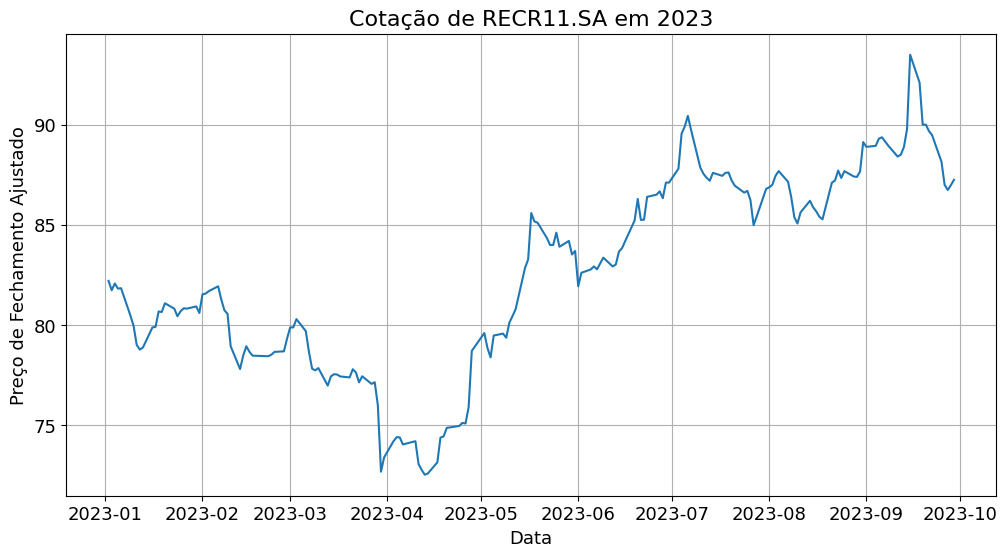

[*********************100%***********************]  1 of 1 completed


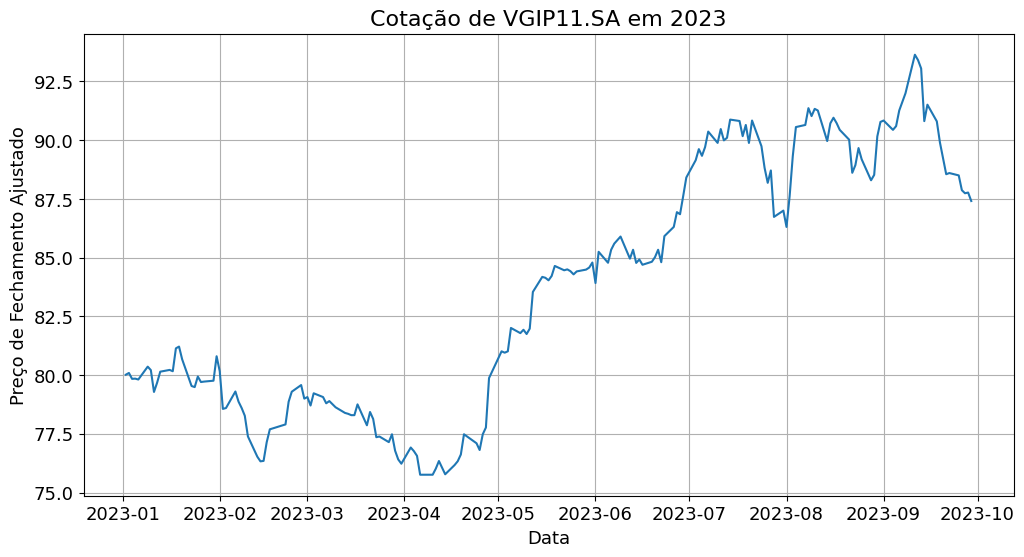

[*********************100%***********************]  1 of 1 completed


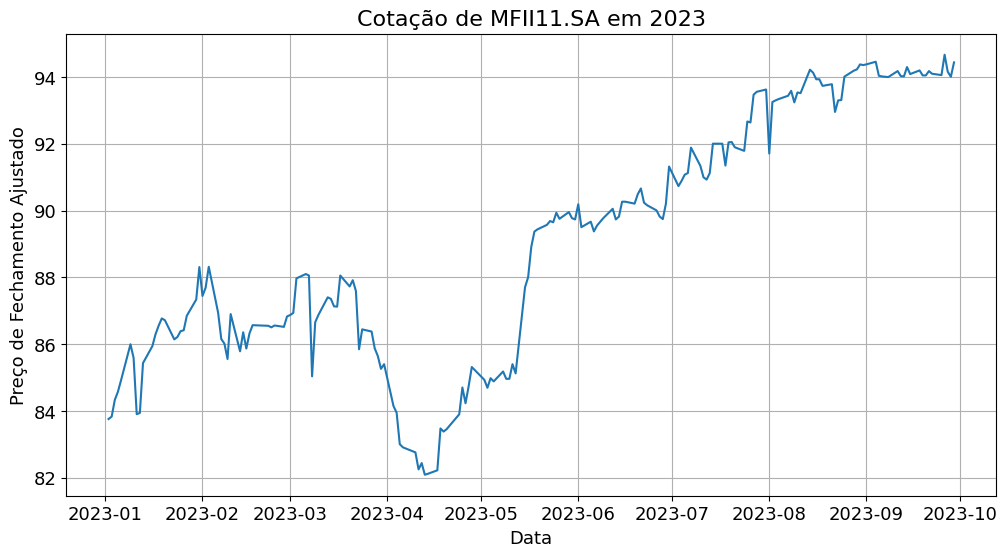

[*********************100%***********************]  1 of 1 completed


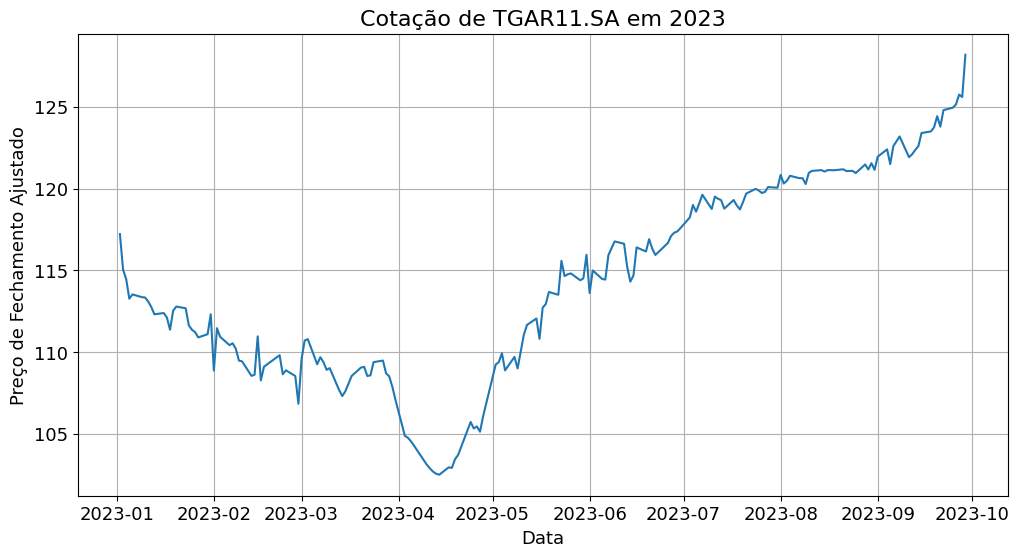

In [4]:
carteira_fii_renda = ['KFOF11.SA', 'XPSF11.SA', 'HGCR11.SA', 'PLCR11.SA', 'RECR11.SA', 'VGIP11.SA', 'MFII11.SA', 'TGAR11.SA']

# Cotação do ano de 2023 até o momento
data_inicio = "2023-01-01"
data_fim = "2023-10-02"

# Baixar as cotações dos ativos
for i, ativo in enumerate(carteira_fii_renda):
    data = yf.download(ativo, start=data_inicio, end=data_fim)

    plt.figure(figsize=(12, 6))
    plt.plot(data['Adj Close'], label=ativo)
    plt.title(f"Cotação de {ativo} em 2023", fontsize=16)
    plt.xlabel("Data",fontsize=13)
    plt.ylabel("Preço de Fechamento Ajustado", fontsize=13)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.grid(True)
    plt.show()



[*********************100%***********************]  1 of 1 completed


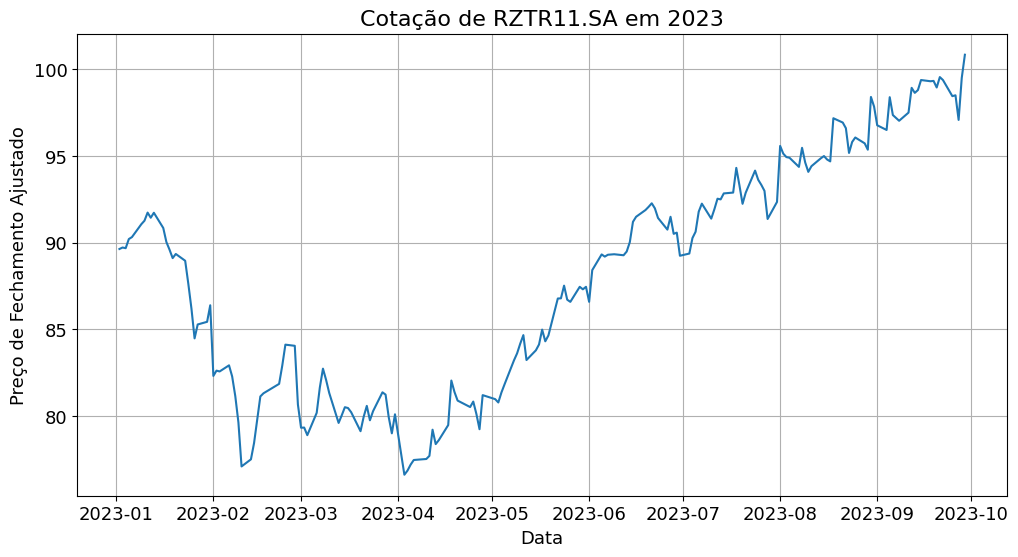

[*********************100%***********************]  1 of 1 completed


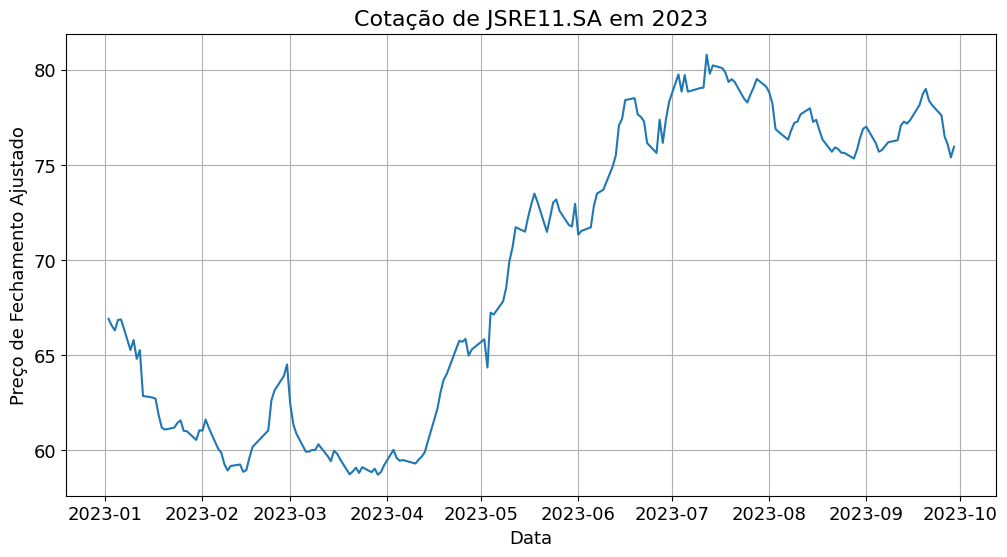

[*********************100%***********************]  1 of 1 completed


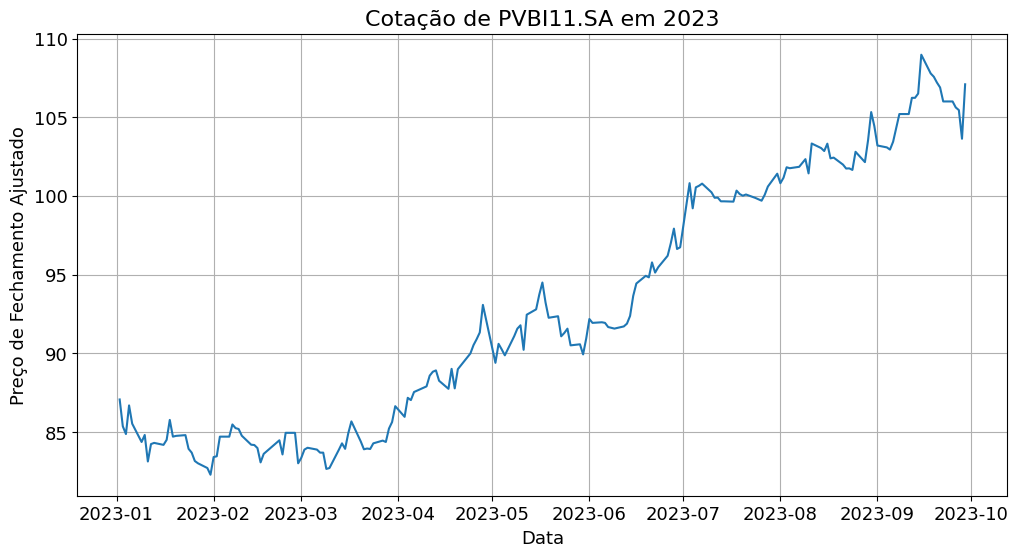

[*********************100%***********************]  1 of 1 completed


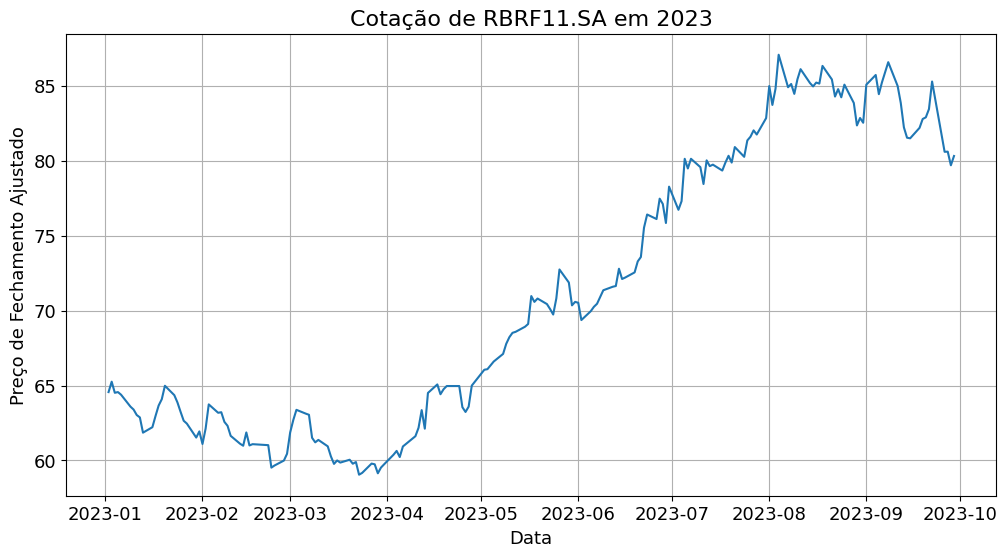

[*********************100%***********************]  1 of 1 completed


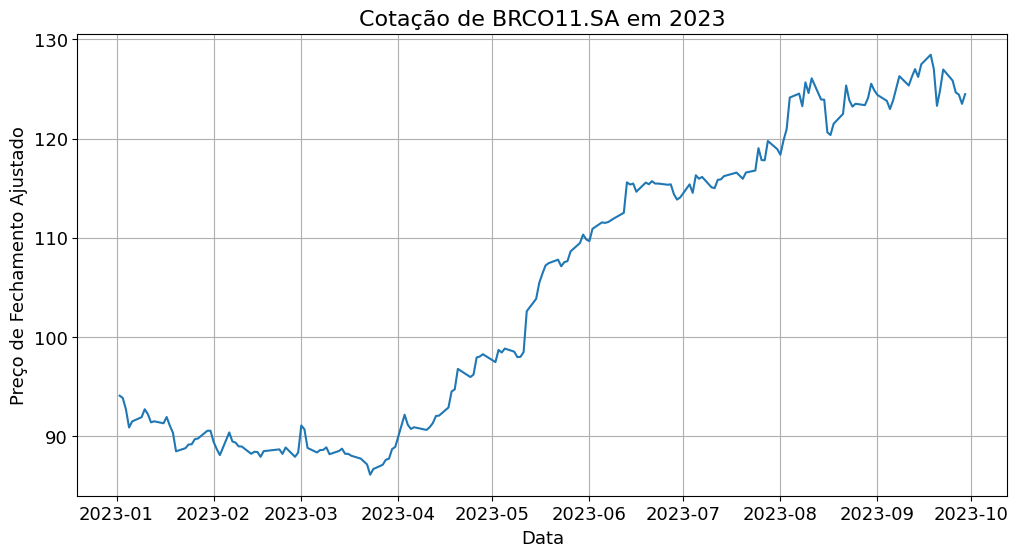

[*********************100%***********************]  1 of 1 completed


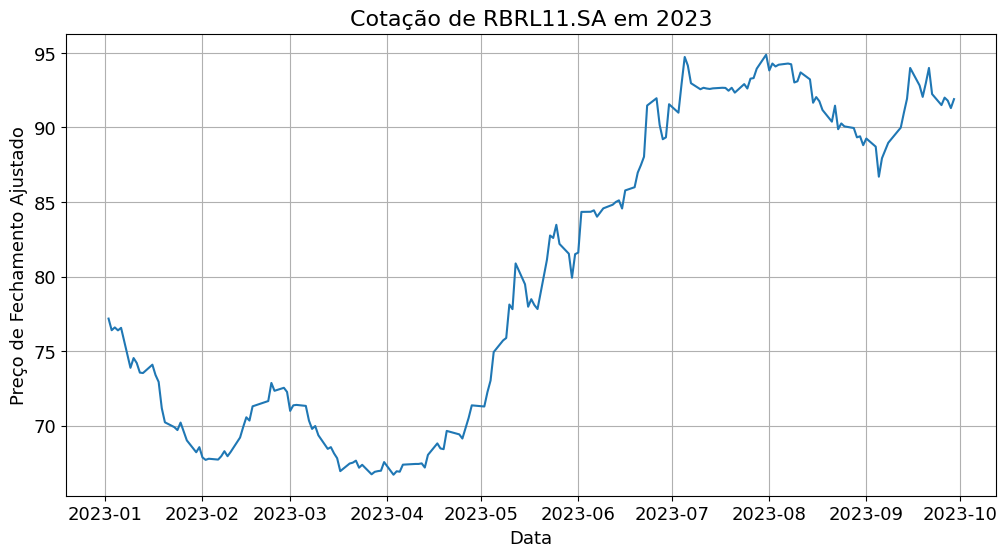

[*********************100%***********************]  1 of 1 completed


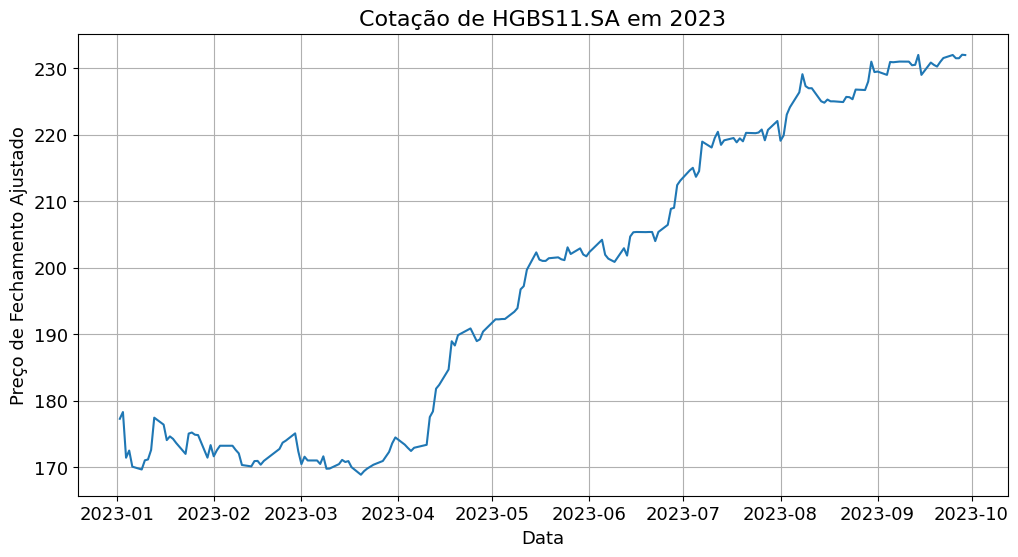

In [5]:
carteira_fii_ganho = ['RZTR11.SA', 'JSRE11.SA', 'PVBI11.SA', 'RBRF11.SA', 'BRCO11.SA', 'RBRL11.SA', 'HGBS11.SA']

# Cotação do ano de 2023 até o momento
data_inicio = "2023-01-01"
data_fim = "2023-10-02"

# Baixar as cotações dos ativos
for i, ativo in enumerate(carteira_fii_ganho):
    data = yf.download(ativo, start=data_inicio, end=data_fim)

    plt.figure(figsize=(12, 6))
    plt.plot(data['Adj Close'], label=ativo)
    plt.title(f"Cotação de {ativo} em 2023", fontsize=16)
    plt.xlabel("Data",fontsize=13)
    plt.ylabel("Preço de Fechamento Ajustado", fontsize=13)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.grid(True)
    plt.show()




In [6]:
# Conjunto com todos os ativos sem repetição
ativos = set(fii_mais_rentaveis + carteira_fii_renda + carteira_fii_ganho)
# Converte o conjunto em uma lista
ativos = list(ativos)
print(ativos)

['RZAK11.SA', 'RECR11.SA', 'HGBS11.SA', 'URPR11.SA', 'RZTR11.SA', 'RBOP11.SA', 'KIVO11.SA', 'VGIP11.SA', 'XPSF11.SA', 'VOTS11.SA', 'HGCR11.SA', 'KFOF11.SA', 'MFII11.SA', 'RBRF11.SA', 'PLCR11.SA', 'RBRL11.SA', 'TGAR11.SA', 'HABT11.SA', 'MGHT11.SA', 'JPPA11.SA', 'KNRE11.SA', 'PVBI11.SA', 'BRCO11.SA', 'JSRE11.SA']


In [7]:
# Lista de ativos
ativos = ['VGIP11.SA', 'RBRF11.SA', 'KFOF11.SA', 'PVBI11.SA', 'MFII11.SA', 'HGCR11.SA', 'RBOP11.SA', 'HABT11.SA', 'TGAR11.SA', 'MGHT11.SA', 'RECR11.SA', 'PLCR11.SA', 'KIVO11.SA', 'HGBS11.SA', 'JPPA11.SA', 'VOTS11.SA', 'XPSF11.SA', 'RBRL11.SA', 'BRCO11.SA', 'RZTR11.SA', 'JSRE11.SA', 'RZAK11.SA', 'KNRE11.SA', 'URPR11.SA']

# Dicionário para armazenar os indicadores de cada ativo
indicadores_por_ativo = {}

for ativo in ativos:
    estoque = yf.Ticker(ativo)
    informacoes = estoque.info

    indicadores = {
    'P/L (Relação Preço-Lucro)': informacoes.get('trailingPE', None),
    'Dividend Yield (Rendimento de Dividendo)': informacoes.get('dividendYield', None),
    'Cap. de Mercado': informacoes.get('marketCap', None),
    'Volume Médio': informacoes.get('averageVolume', None)
    }


    def formatar_valor(valor, tipo='moeda'):
        if valor is None:
            return None
        if tipo == 'moeda':
            return f"R$ {valor:,.2f}"
        elif tipo == 'porcentagem':
            return f"{valor * 100:.2f}%"

    for chave in indicadores:
        if "Yield" in chave :
            indicadores[chave] = formatar_valor(indicadores[chave], 'porcentagem')
        elif "Cap. de Mercado" in chave:
            indicadores[chave] = formatar_valor(indicadores[chave], 'moeda')

    indicadores_por_ativo[ativo] = indicadores

# Criar DataFrame
dfs = []
for ativo, indicadores in indicadores_por_ativo.items():
    df = pd.DataFrame(list(indicadores.items()), columns=['Indicador', 'Valor'])
    df['Ativo'] = ativo
    dfs.append(df)

resultado_df = pd.concat(dfs, ignore_index=True)

print(resultado_df)

                                   Indicador    Valor      Ativo
0                  P/L (Relação Preço-Lucro)     None  VGIP11.SA
1   Dividend Yield (Rendimento de Dividendo)    8.68%  VGIP11.SA
2                            Cap. de Mercado     None  VGIP11.SA
3                               Volume Médio    22999  VGIP11.SA
4                  P/L (Relação Preço-Lucro)     40.5  RBRF11.SA
..                                       ...      ...        ...
91                              Volume Médio    17074  KNRE11.SA
92                 P/L (Relação Preço-Lucro)      NaN  URPR11.SA
93  Dividend Yield (Rendimento de Dividendo)      NaN  URPR11.SA
94                           Cap. de Mercado      NaN  URPR11.SA
95                              Volume Médio  22982.0  URPR11.SA

[96 rows x 3 columns]


In [8]:
resultado = resultado_df.pivot(index=['Indicador'], columns=['Ativo'], values='Valor').fillna('N/A')
resultado

Ativo                                    BRCO11.SA          HABT11.SA  \
Indicador                                                               
Cap. de Mercado                                N/A  R$ 390,131,168.00   
Dividend Yield (Rendimento de Dividendo)     8.45%             14.61%   
P/L (Relação Preço-Lucro)                      N/A                N/A   
Volume Médio                                 27358              13870   

Ativo                                               HGBS11.SA  \
Indicador                                                       
Cap. de Mercado                           R$ 2,321,191,936.00   
Dividend Yield (Rendimento de Dividendo)               10.35%   
P/L (Relação Preço-Lucro)                           10.090474   
Volume Médio                                            22233   

Ativo                                               HGCR11.SA JPPA11.SA  \
Indicador                                                                 
Cap. de Mercado                           R$ 1,670,551,168.00       N/A   
Dividend Yield (Rendimento de Dividendo)               12.27%    13.98%   
P/L (Relação Preço-Lucro)                                 N/A       N/A   
Volume Médio                                            37753      2782   

Ativo                                               JSRE11.SA KFOF11.SA  \
Indicador                                                                 
Cap. de Mercado                           R$ 1,577,484,032.00       N/A   
Dividend Yield (Rendimento de Dividendo)                7.26%     9.63%   
P/L (Relação Preço-Lucro)                           12.231884       N/A   
Volume Médio                                            39365     15577   

Ativo                                    KIVO11.SA KNRE11.SA  \
Indicador                                                      
Cap. de Mercado                                N/A       N/A   
Dividend Yield (Rendimento de Dividendo)       N/A   235.27%   
P/L (Relação Preço-Lucro)                      N/A       N/A   
Volume Médio                                2404.0     17074   

Ativo                                             MFII11.SA  ...  \
Indicador                                                    ...   
Cap. de Mercado                           R$ 391,928,832.00  ...   
Dividend Yield (Rendimento de Dividendo)             13.66%  ...   
P/L (Relação Preço-Lucro)                          8.037447  ...   
Volume Médio                                           5314  ...   

Ativo                                               RBRF11.SA  \
Indicador                                                       
Cap. de Mercado                           R$ 1,108,144,768.00   
Dividend Yield (Rendimento de Dividendo)                8.19%   
P/L (Relação Preço-Lucro)                                40.5   
Volume Médio                                            40049   

Ativo                                             RBRL11.SA  \
Indicador                                                     
Cap. de Mercado                           R$ 604,240,960.00   
Dividend Yield (Rendimento de Dividendo)              8.49%   
P/L (Relação Preço-Lucro)                         13.753425   
Volume Médio                                          12565   

Ativo                                               RECR11.SA RZAK11.SA  \
Indicador                                                                 
Cap. de Mercado                           R$ 2,293,808,896.00       N/A   
Dividend Yield (Rendimento de Dividendo)                8.24%       N/A   
P/L (Relação Preço-Lucro)                            7.211139       N/A   
Volume Médio                                            60364   48364.0   

Ativo                                    RZTR11.SA TGAR11.SA URPR11.SA  \
Indicador                                                                
Cap. de Mercado                                N/A       N/A       N/A   
Dividend Yield (Rendimento de D

## Candlestick

In [11]:
for ativo in ativos:
    df = yf.download(ativo, start='2022-09-01', end='2023-07-30')

    fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

    fig.update_layout(title=f'Gráfico de Candlestick para {ativo}')
    fig.show()


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


Candlestick de alta (bullish): O preço de abertura é inferior ao preço de fechamento. O corpo é representado de forma sólida na cor verde e indica pressão de compra.

Candlestick de baixa (bearish): O preço de abertura é superior ao preço de fechamento.  corpo é representado de forma sólida na cor vermelha e indica pressão de compra.

In [12]:
ativos = ['VGIP11.SA', 'RBRF11.SA', 'KFOF11.SA', 'PVBI11.SA', 'MFII11.SA', 'HGCR11.SA', 'RBOP11.SA', 'HABT11.SA', 'TGAR11.SA', 'MGHT11.SA', 'RECR11.SA', 'PLCR11.SA', 'KIVO11.SA', 'HGBS11.SA', 'JPPA11.SA', 'VOTS11.SA', 'XPSF11.SA', 'RBRL11.SA', 'BRCO11.SA', 'RZTR11.SA', 'JSRE11.SA', 'RZAK11.SA', 'KNRE11.SA', 'URPR11.SA']

resultados_candles = []

for ativo in ativos:
    df = yf.download(ativo, start='2023-09-01', end='2023-10-02')

    ultimo_candlestick = 'Alta' if df['Close'].iloc[-1] > df['Open'].iloc[-1] else 'Baixa'

    resultados_candles.append({'Ativo': ativo, 'Último Candlestick': ultimo_candlestick})

df_candles = pd.DataFrame(resultados_candles)
print(df_candles)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [14]:
# Tabela dinâmica com a contagem de alta e baixa
pivot_table = pd.pivot_table(df_candles, index=['Último Candlestick'], aggfunc='count')

# Renomeiar a coluna 'Ativo' para 'Contagem'
pivot_table = pivot_table.rename(columns={'Ativo': 'Contagem'})

# Imprimir a tabela dinâmica
print(pivot_table)

                    Contagem
Último Candlestick          
Alta                      16
Baixa                      8


In [58]:
# Filtrar fundos com candlestick de alta (bullish)
fundos_candle_alta = df_candles[df_candles['Último Candlestick'] == 'Alta']

# Filtrar fundos com candlestick de baixa (bearish)
fundos_candle_baixa = df_candles[df_candles['Último Candlestick'] == 'Baixa']

# Imprimir a lista de fundos com candlestick de alta
print("Fundos com Candlestick de Alta:")
print(fundos_candle_alta['Ativo'].tolist())

# Imprimir a lista de fundos com candlestick de baixa
print("\nFundos com Candlestick de Baixa:")
print(fundos_candle_baixa['Ativo'].tolist())


Fundos com Candlestick de Alta:
['RBRF11.SA', 'KFOF11.SA', 'PVBI11.SA', 'MFII11.SA', 'HGCR11.SA', 'HABT11.SA', 'TGAR11.SA', 'RECR11.SA', 'PLCR11.SA', 'HGBS11.SA', 'JPPA11.SA', 'BRCO11.SA', 'RZTR11.SA', 'JSRE11.SA', 'RZAK11.SA', 'URPR11.SA']

Fundos com Candlestick de Baixa:
['VGIP11.SA', 'RBOP11.SA', 'MGHT11.SA', 'KIVO11.SA', 'VOTS11.SA', 'XPSF11.SA', 'RBRL11.SA', 'KNRE11.SA']


## RSI

O RSI varia de 0 a 100.
Tradicionalmente, o RSI é considerado sobrecomprado quando acima de 70 e sobrevendido quando abaixo de 30.
Valores acima de 70 podem indicar que o ativo está em um estado de sobrecompra, o que poderia levar a uma reversão de preço em breve.
Valores abaixo de 30 podem indicar que o ativo está em um estado de sobrevenda, o que poderia levar a uma reversão de preço para cima em breve.

In [15]:
# Lista de ativos
ativos = ['VGIP11.SA', 'RBRF11.SA', 'KFOF11.SA', 'PVBI11.SA', 'MFII11.SA', 'HGCR11.SA', 'RBOP11.SA', 'HABT11.SA', 'TGAR11.SA', 'MGHT11.SA', 'RECR11.SA', 'PLCR11.SA', 'KIVO11.SA', 'HGBS11.SA', 'JPPA11.SA', 'VOTS11.SA', 'XPSF11.SA', 'RBRL11.SA', 'BRCO11.SA', 'RZTR11.SA', 'JSRE11.SA', 'RZAK11.SA', 'KNRE11.SA', 'URPR11.SA']

def calculo_rsi(dados, tempo):
    delta = dados.diff()
    up, down = delta.copy(), delta.copy()

    up[up < 0] = 0
    down[down > 0] = 0

    roll_up = up.rolling(window=tempo).mean()
    roll_down = down.abs().rolling(window=tempo).mean()

    rs = roll_up / roll_down
    rsi = 100 - (100 / (1 + rs))

    return rsi

resultados_rsi = []

for i, ativo in enumerate(ativos):
    df = yf.download(ativo, start='2023-09-01', end='2023-10-01')
    df['RSI'] = calculo_rsi(df['Close'], 14)
    ultimo_rsi = df['RSI'].iloc[-1]

    if ultimo_rsi < 30:
        estado_rsi = 'Sobrevenda (RSI < 30)'
    elif ultimo_rsi > 70:
        estado_rsi = 'Sobrecompra (RSI > 70)'
    else:
        estado_rsi = '30 <= RSI <= 70'

    resultados_rsi.append({'Ativo': ativo, 'Estado RSI': estado_rsi})

# Criando um DataFrame com os resultados
df_rsi = pd.DataFrame(resultados_rsi)
print(df_rsi)
   

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
# Lista de ativos
ativos = ['VGIP11.SA', 'RBRF11.SA', 'KFOF11.SA', 'PVBI11.SA', 'MFII11.SA', 'HGCR11.SA', 'RBOP11.SA', 'HABT11.SA', 'TGAR11.SA', 'MGHT11.SA', 'RECR11.SA', 'PLCR11.SA', 'KIVO11.SA', 'HGBS11.SA', 'JPPA11.SA', 'VOTS11.SA', 'XPSF11.SA', 'RBRL11.SA', 'BRCO11.SA', 'RZTR11.SA', 'JSRE11.SA', 'RZAK11.SA', 'KNRE11.SA', 'URPR11.SA']

for i, ativo in enumerate(ativos):
    df = yf.download(ativo, start='2023-09-01', end='2023-10-01')
    df['RSI'] = calculo_rsi(df['Close'], 14)

    fig = go.Figure()

    fig.add_trace(go.Scatter(x=df.index, y=df['RSI'], mode='lines', name='RSI', line=dict(width=1.5)))
    
    # Adiciona uma linha com o preço do ativo
    fig.add_trace(go.Scatter(x=df.index, y=df['Close'], mode='lines', name='Preço', line=dict(width=1.5, color='black')))

    fig.update_layout(title=f"RSI e Preço para {ativo}",
                      yaxis_title="RSI / Preço",
                      xaxis_rangeslider_visible=False,
                      yaxis_fixedrange=False)
    
    # Ajusta a frequência dos rótulos de data no eixo x
    fig.update_xaxes(
        tickangle=-45,  # Ângulo de rotação dos rótulos para melhor legibilidade
        dtick='M1',  # Exibe rótulos de data mensais
        tickformat='%Y-%m'  # Formato da data
    )

    fig.show()


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


In [60]:
# Filtrar fundos com sobrevenda 

df_rsi_sobrevenda = df_rsi[df_rsi['Estado RSI'] == 'Sobrevenda (RSI < 30)']

# Imprimir a lista de fundos com sobrevenda
print("Fundos com sobrevenda:")
print(df_rsi_sobrevenda['Ativo'].tolist())

# Filtrar fundos com sobrecompra
df_rsi_sobrecompra = df_rsi[df_rsi['Estado RSI'] == 'Sobrecompra (RSI > 70)']

# Imprimir a lista de fundos com sobrecompra
print("\nFundos com sobrecompra:")
print(df_rsi_sobrecompra['Ativo'].tolist())

Fundos com sobrevenda:
['VGIP11.SA', 'MGHT11.SA']

Fundos com sobrecompra:
['HGCR11.SA', 'TGAR11.SA']


## MACD

Cruzamento da Linha MACD e Linha de Sinal: Quando a linha MACD cruza acima da linha de sinal, é um sinal de compra, o que indica uma possível reversão de tendência de baixa para alta. Por outro lado, quando a linha MACD cruza abaixo da linha de sinal, é um sinal de venda, o que indica uma possível reversão de tendência de alta para baixa.

In [ ]:
# Função para o cálculo para o MACD
def calculo_macd(dados):
    short_window = 12
    long_window = 26
    signal_window = 9

    # ewm do pandas para o cálculo da média móvel exponencialmente ponderada
    short_media = dados.ewm(span=short_window, adjust=False).mean()
    long_media = dados.ewm(span=long_window, adjust=False).mean()

    macd = short_media - long_media
    signal = macd.ewm(span=signal_window, adjust=False).mean()

    return macd, signal

for ativo in ativos:
    df = yf.download(ativo, start='2023-09-01', end='2023-10-02')
    df['MACD'], df['Signal'] = calculo_macd(df['Close'])

    fig = go.Figure()

    fig.add_trace(go.Scatter(x=df.index, y=df['MACD'], mode='lines', name='MACD', line=dict(width=1.5)))
    fig.add_trace(go.Scatter(x=df.index, y=df['Signal'], mode='lines', name='Signal', line=dict(width=1.5, dash='dash')))
    fig.update_layout(title=f"MACD para {ativo}",
                      yaxis_title="MACD",
                      xaxis_rangeslider_visible=False,
                      yaxis_fixedrange=False)

    fig.show()


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed



Fundos com MACD no cruzamento de alta: MFII11.SA, HGCR11.SA, TGAR11.SA,  PLCR11.SA, KIVO11.SA, HGBS11.SA, VOTS11.SA, RZTR11.SA, KNRE11.SA

Fundos com MACD no cruzamento de baixa: VGIP11.SA, RBRF11.SA, KFOF11.SA, PVBI11.SA, RBOP11.SA, HABT11.SA, MGHT11.SA, RECR11.SA, JPPA11.SA, XPSF11.SA, RBRL11.SA, BRCO11.SA, JSRE11.SA, RZKA11.SA, URPR11.SA



In [69]:
# Fundos com MACD no cruzamento de alta
fundos_cruzamento_alta = [
    'MFII11.SA', 'HGCR11.SA', 'TGAR11.SA', 'PLCR11.SA',
    'KIVO11.SA', 'HGBS11.SA', 'VOTS11.SA', 'RZTR11.SA', 'KNRE11.SA'
]

# Fundos com MACD no cruzamento de baixa
fundos_cruzamento_baixa = [
    'VGIP11.SA', 'RBRF11.SA', 'KFOF11.SA', 'PVBI11.SA',
    'RBOP11.SA', 'HABT11.SA', 'MGHT11.SA', 'RECR11.SA',
    'JPPA11.SA', 'XPSF11.SA', 'RBRL11.SA', 'BRCO11.SA',
    'JSRE11.SA', 'RZKA11.SA', 'URPR11.SA'
]

# Imprimir as listas
print("Fundos com MACD no cruzamento de alta:")
print(fundos_cruzamento_alta)

print("\nFundos com MACD no cruzamento de baixa:")
print(fundos_cruzamento_baixa)


Fundos com MACD no cruzamento de alta:
['MFII11.SA', 'HGCR11.SA', 'TGAR11.SA', 'PLCR11.SA', 'KIVO11.SA', 'HGBS11.SA', 'VOTS11.SA', 'RZTR11.SA', 'KNRE11.SA']

Fundos com MACD no cruzamento de baixa:
['VGIP11.SA', 'RBRF11.SA', 'KFOF11.SA', 'PVBI11.SA', 'RBOP11.SA', 'HABT11.SA', 'MGHT11.SA', 'RECR11.SA', 'JPPA11.SA', 'XPSF11.SA', 'RBRL11.SA', 'BRCO11.SA', 'JSRE11.SA', 'RZKA11.SA', 'URPR11.SA']


## Retornos dos Ativos

In [42]:
ativos = ['VGIP11.SA', 'RBRF11.SA', 'KFOF11.SA', 'PVBI11.SA', 'MFII11.SA', 'HGCR11.SA', 'RBOP11.SA', 'HABT11.SA', 'TGAR11.SA', 'MGHT11.SA', 'RECR11.SA', 'PLCR11.SA', 'KIVO11.SA', 'HGBS11.SA', 'JPPA11.SA', 'VOTS11.SA', 'XPSF11.SA', 'RBRL11.SA', 'BRCO11.SA', 'RZTR11.SA', 'JSRE11.SA', 'RZAK11.SA', 'KNRE11.SA', 'URPR11.SA']

# Inicia o DataFrame vazio para armezenar os retornos dos ativos
retorno_ativos = pd.DataFrame()

# Retorno do mês de setembro
for ativo in ativos:
    data = yf.Ticker(ativo)
    start_date = "2023-09-01"
    end_date = "2023-10-02"

    # DataFrame data que contém os preços de fechamento diários dos ativos
    data = data.history(start=start_date, end=end_date)

    # Função pct.change calcula os retornos percentuais diários do ativo
    data['Retorno'] = data['Close'].pct_change()

    # adicionar os retornos no DataFrame geral
    retorno_ativos[ativo] = data['Retorno']

# Remove as linhas que contêm valores ausentes (NAs)
retorno_ativos = retorno_ativos.dropna()

print(retorno_ativos)


                           VGIP11.SA  RBRF11.SA  KFOF11.SA  PVBI11.SA  \
Date                                                                    
2023-09-04 00:00:00-03:00  -0.004373   0.007590   0.002682  -0.001163   
2023-09-05 00:00:00-03:00   0.001757  -0.014950  -0.005555  -0.001358   
2023-09-06 00:00:00-03:00   0.007345   0.009412  -0.003207   0.004857   
2023-09-08 00:00:00-03:00   0.008053   0.015734   0.002491   0.017015   
2023-09-11 00:00:00-03:00   0.017813  -0.018359  -0.000104   0.000000   
2023-09-12 00:00:00-03:00  -0.002440  -0.013325   0.003209   0.009791   
2023-09-13 00:00:00-03:00  -0.003828  -0.019437  -0.003096   0.000000   
2023-09-14 00:00:00-03:00  -0.024073  -0.008391   0.017081   0.002542   
2023-09-15 00:00:00-03:00   0.007708  -0.000491  -0.012316   0.023192   
2023-09-18 00:00:00-03:00  -0.007759   0.008589   0.009893  -0.010920   
2023-09-19 00:00:00-03:00  -0.009912   0.007178   0.019592  -0.001948   
2023-09-20 00:00:00-03:00  -0.007564   0.001329  -0

In [45]:
def calcula_estat(column):
    return pd.Series({
        'Média': column.mean(),
        'Mediana': column.median(),
        'Desvio Padrão (populacional)': column.std(ddof=0),
        'Desvio Padrão (amostral)': column.std(),
        'Variância (populacional)': column.var(ddof=0),
        'Variância (amostral)': column.var(),
        'Coeficiente de Variação': (column.std() / column.mean())  if column.mean() != 0 else 0
    })

estatisticas_retorno = retorno_ativos.select_dtypes(include=['float64']).apply(calcula_estat)

estatisticas_retorno

VGIP11.SA  RBRF11.SA  KFOF11.SA  PVBI11.SA  \
Média                         -0.001984  -0.002916   0.000880   0.002015   
Mediana                       -0.002440   0.000124   0.000601  -0.001163   
Desvio Padrão (populacional)   0.008542   0.014796   0.017774   0.011517   
Desvio Padrão (amostral)       0.008776   0.015202   0.018262   0.011832   
Variância (populacional)       0.000073   0.000219   0.000316   0.000133   
Variância (amostral)           0.000077   0.000231   0.000333   0.000140   
Coeficiente de Variação       -4.422758  -5.212631  20.755060   5.872286   

                              MFII11.SA  HGCR11.SA  RBOP11.SA  HABT11.SA  \
Média                          0.000037   0.001278  -0.001942  -0.001032   
Mediana                       -0.000213   0.000929  -0.000339  -0.001928   
Desvio Padrão (populacional)   0.002732   0.004133   0.012789   0.006171   
Desvio Padrão (amostral)       0.002807   0.004246   0.013139   0.006340   
Variância (populacional)       0.000007   0.000017   0.000164   0.000038   
Variância (amostral)           0.000008   0.000018   0.000173   0.000040   
Coeficiente de Variação       75.497920   3.322956  -6.766927  -6.146652   

                              TGAR11.SA  MGHT11.SA  ...  JPPA11.SA  VOTS11.SA  \
Média                          0.002650  -0.004692  ...  -0.000571  -0.000974   
Mediana                        0.002024  -0.000484  ...  -0.001288  -0.000845   
Desvio Padrão (populacional)   0.006409   0.012728  ...   0.004060   0.010355   
Desvio Padrão (amostral)       0.006585   0.013076  ...   0.004171   0.010639   
Variância (populacional)       0.000041   0.000162  ...   0.000016   0.000107   
Variância (amostral)           0.000043   0.000171  ...   0.000017   0.000113   
Coeficiente de Variação        2.484439  -2.786986  ...  -7.308032 -10.922936   

                              XPSF11.SA  RBRL11.SA   BRCO11.SA  RZTR11.SA  \
Média                         -0.002182   0.001606    0.000101   0.002219   
Mediana                       -0.002398   0.005464   -0.001765   0.000201   
Desvio Padrão (populacional)   0.009521   0.011750    0.011597   0.009885   
Desvio Padrão (amostral)       0.009781   0.012072    0.011914   0.010156   
Variância (populacional)       0.000091   0.000138    0.000134   0.000098   
Variância (amostral)           0.000096   0.000146    0.000142   0.000103   
Coeficiente de Variação       -4.483768   7.517979  117.605486   4.576163   

                              JSRE11.SA  RZAK11.SA  KNRE11.SA  URPR11.SA  
Média                         -0.000697   0.001352  -0.002610  -0.001375  
Mediana                        0.001189   0.000323   0.000000  -0.002285  
Desvio Padrão (populacional)   0.007087   0.005848   0.021521   0.006311  
Desvio Padrão (amostral)       0.007282   0.006009   0.022110   0.006484  
Variância (populacional)       0.000050   0.000034   0.000463   0.000040  
Variância (amostral)           0.000053   0.000036   0.000489   0.000042  
Coeficiente de Variação      -10.445121   4.445336  -8.471888  -4.715043  

[7 rows x 24 columns]

## Previsão de Preço usando Média Móvel

[*********************100%***********************]  1 of 1 completed
Ativo: VGIP11.SA, RMSE: 2.662621457553978
[*********************100%***********************]  1 of 1 completed
Ativo: RBRF11.SA, RMSE: 3.0509818657001526
[*********************100%***********************]  1 of 1 completed
Ativo: KFOF11.SA, RMSE: 2.3618002894888095
[*********************100%***********************]  1 of 1 completed
Ativo: PVBI11.SA, RMSE: 1.8435847416361784
[*********************100%***********************]  1 of 1 completed
Ativo: MFII11.SA, RMSE: 0.38624549006889647
[*********************100%***********************]  1 of 1 completed
Ativo: HGCR11.SA, RMSE: 0.921946284542225
[*********************100%***********************]  1 of 1 completed
Ativo: RBOP11.SA, RMSE: 12.53156084458245
[*********************100%***********************]  1 of 1 completed
Ativo: HABT11.SA, RMSE: 2.466854822568626
[*********************100%***********************]  1 of 1 completed
Ativo: TGAR11.SA, RMSE: 2.726171698099

C:\Users\tatia\AppData\Local\Temp\ipykernel_23920\3387628264.py:23: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



[*********************100%***********************]  1 of 1 completed
Ativo: RZAK11.SA, RMSE: 0.35928084246809616
[*********************100%***********************]  1 of 1 completed
Ativo: KNRE11.SA, RMSE: 0.015721074734407706
[*********************100%***********************]  1 of 1 completed
Ativo: URPR11.SA, RMSE: 2.9514562758153784


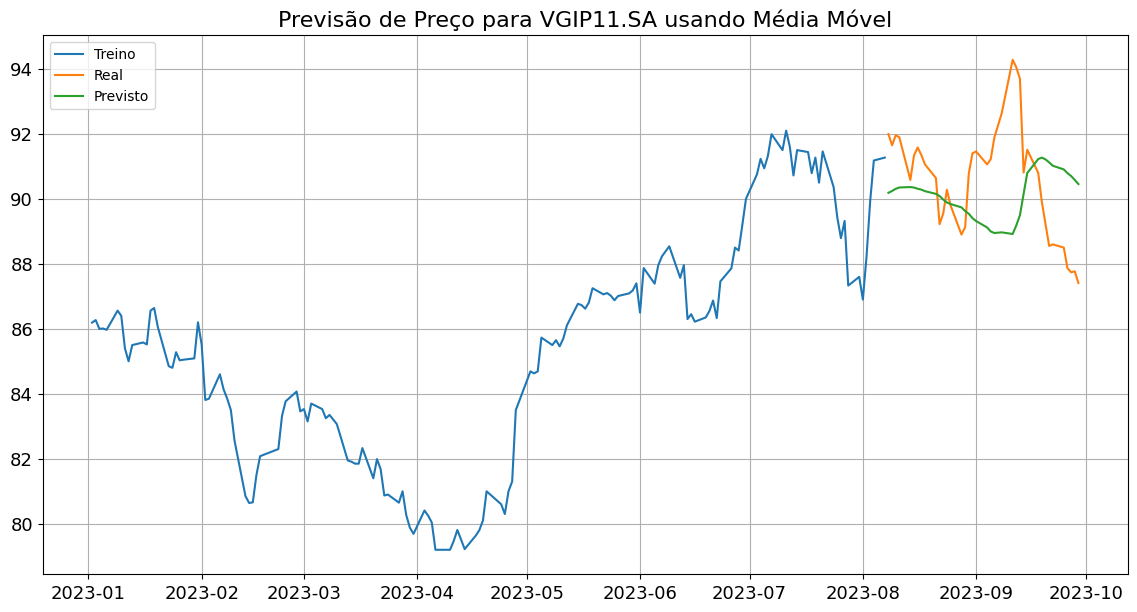

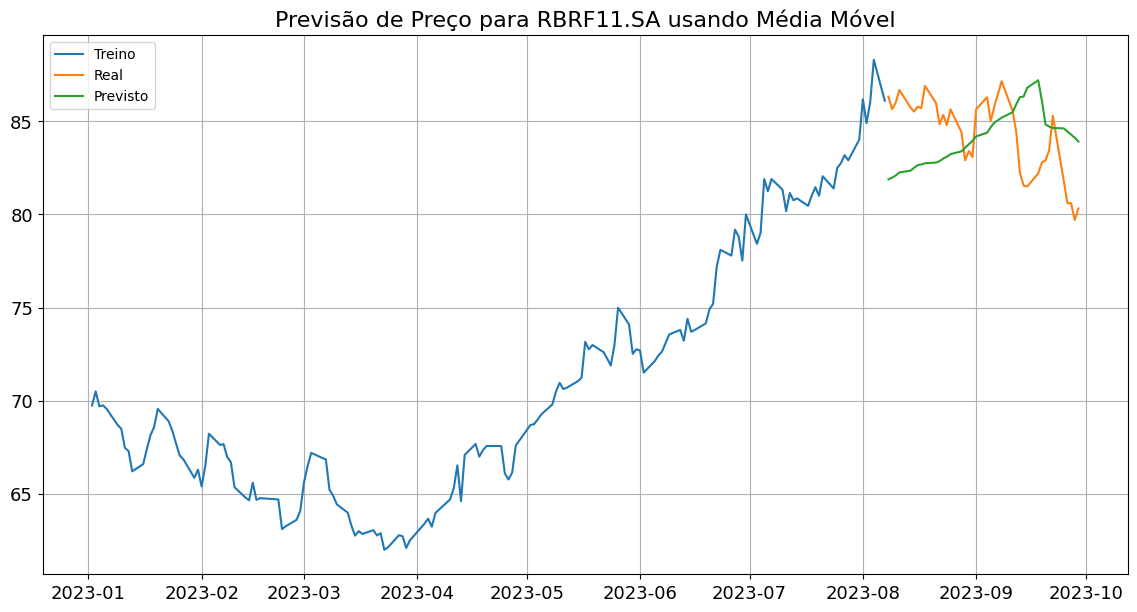

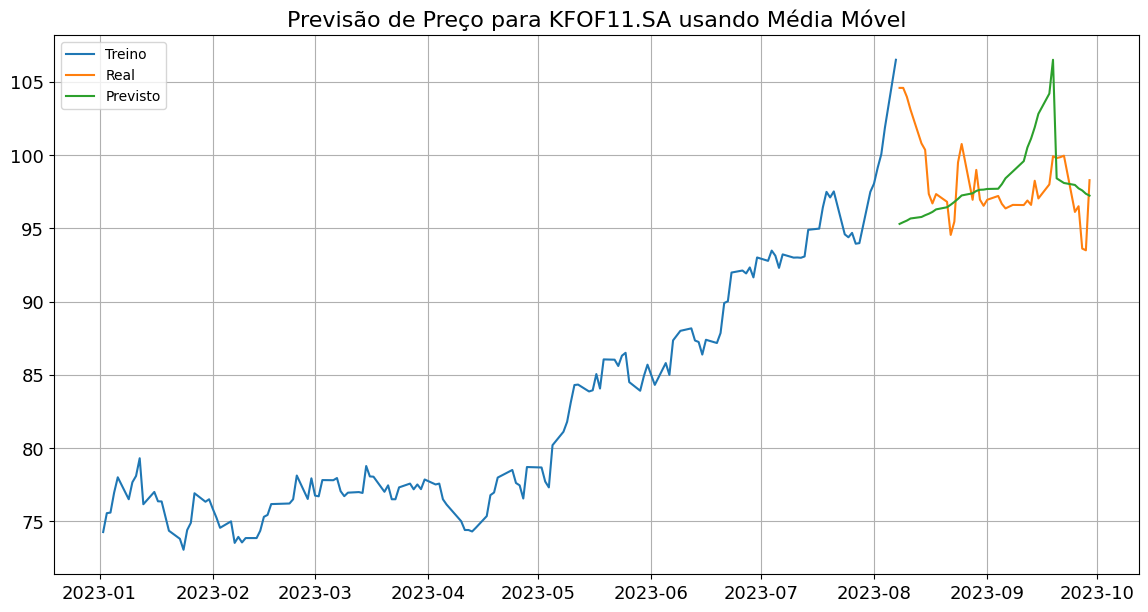

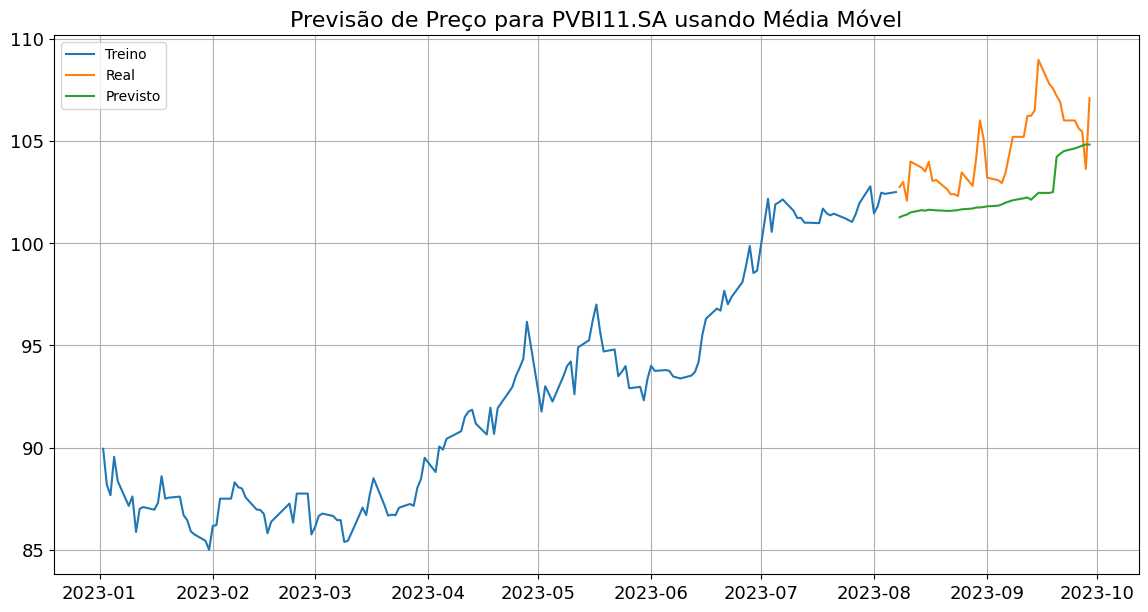

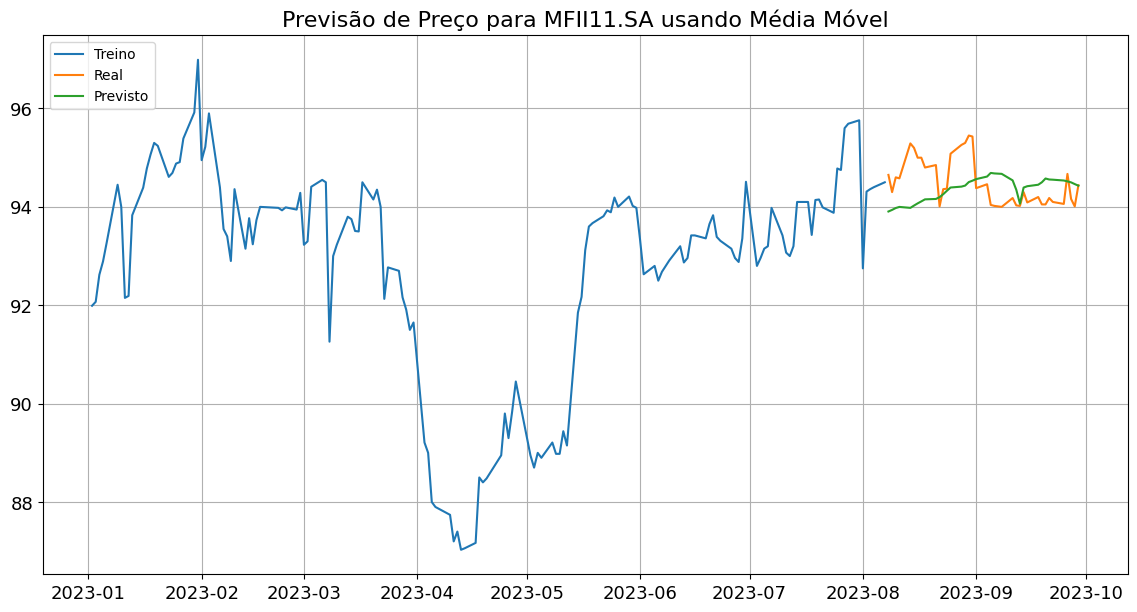

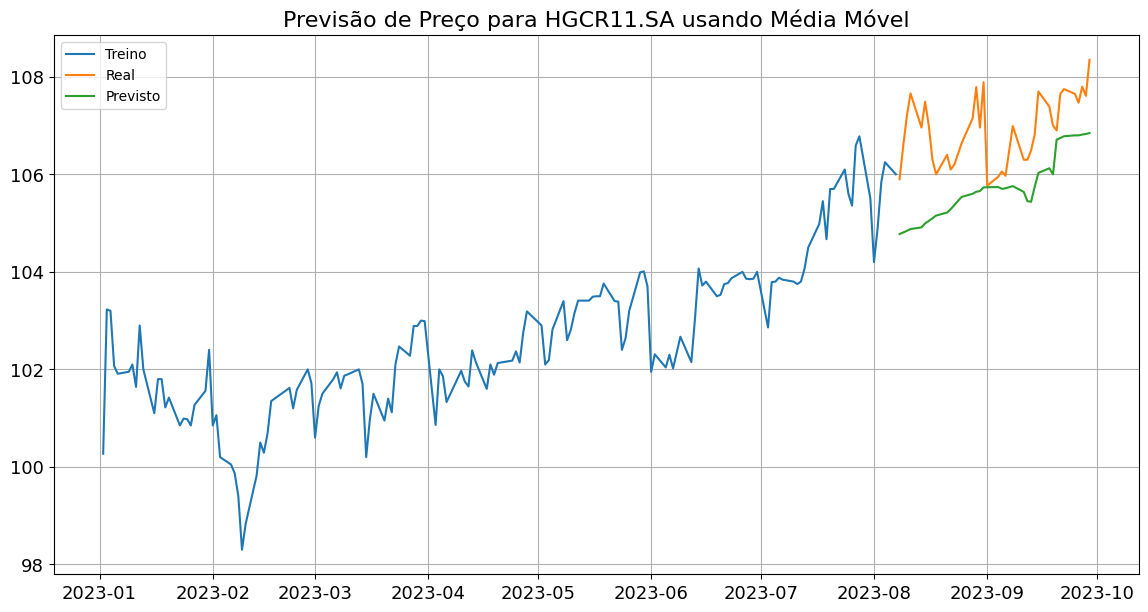

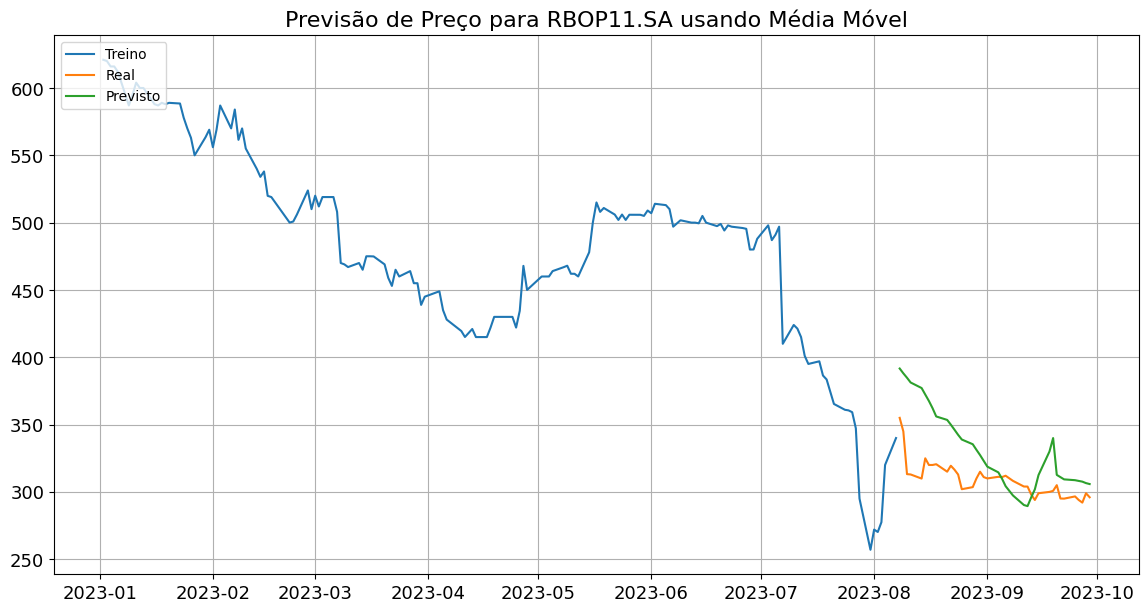

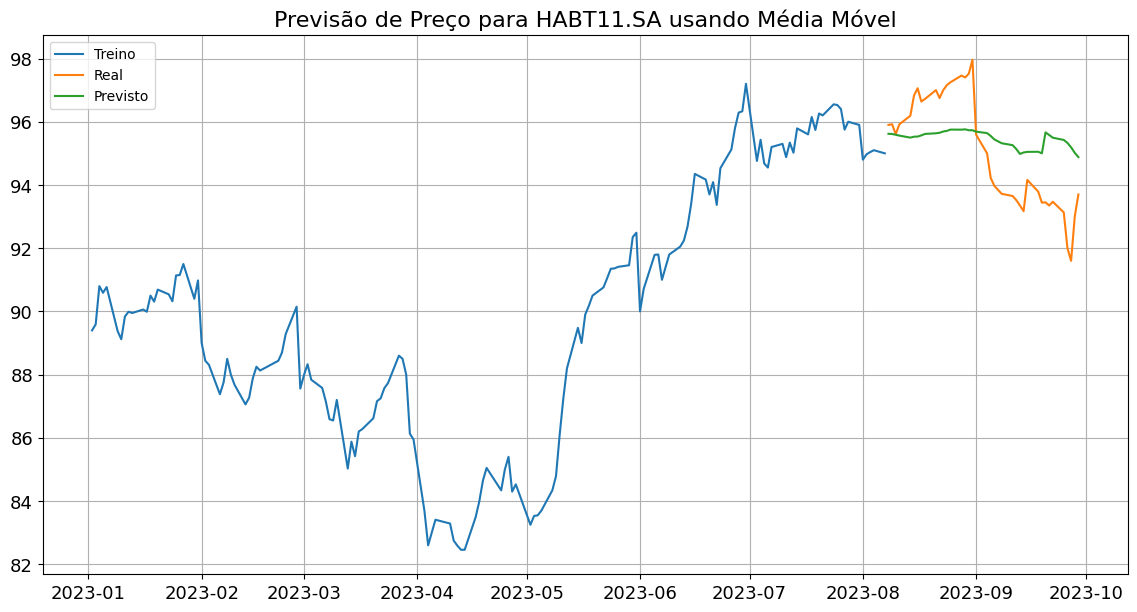

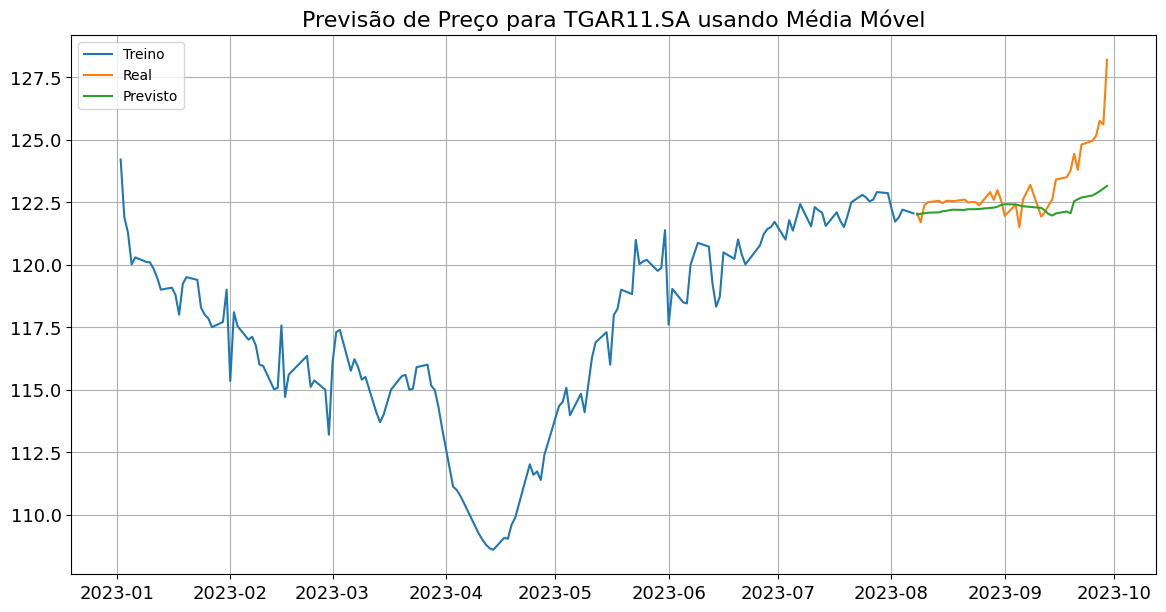

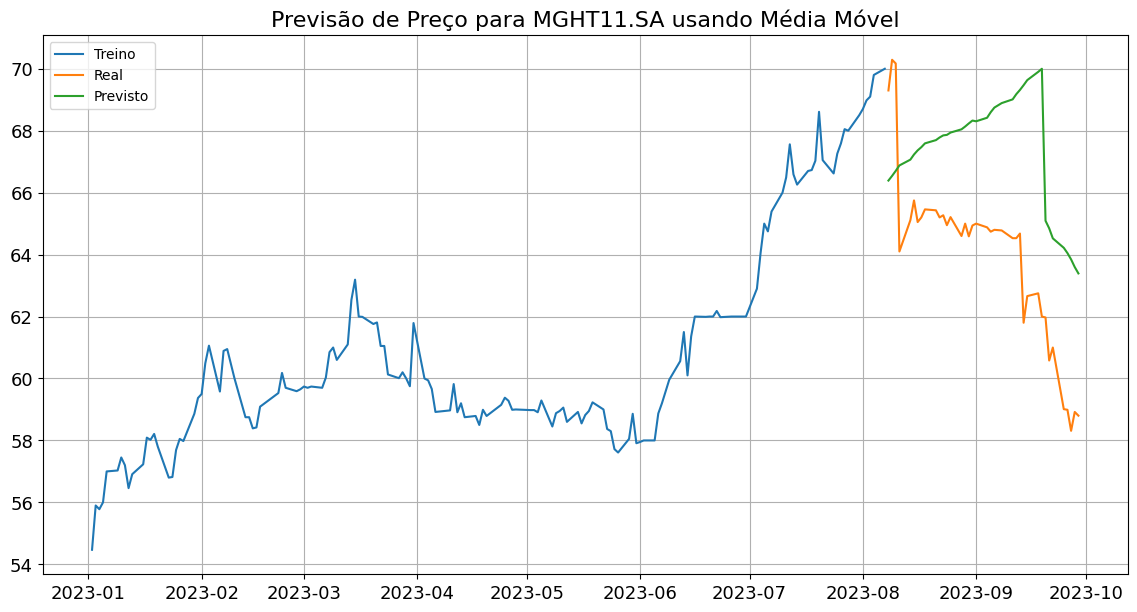

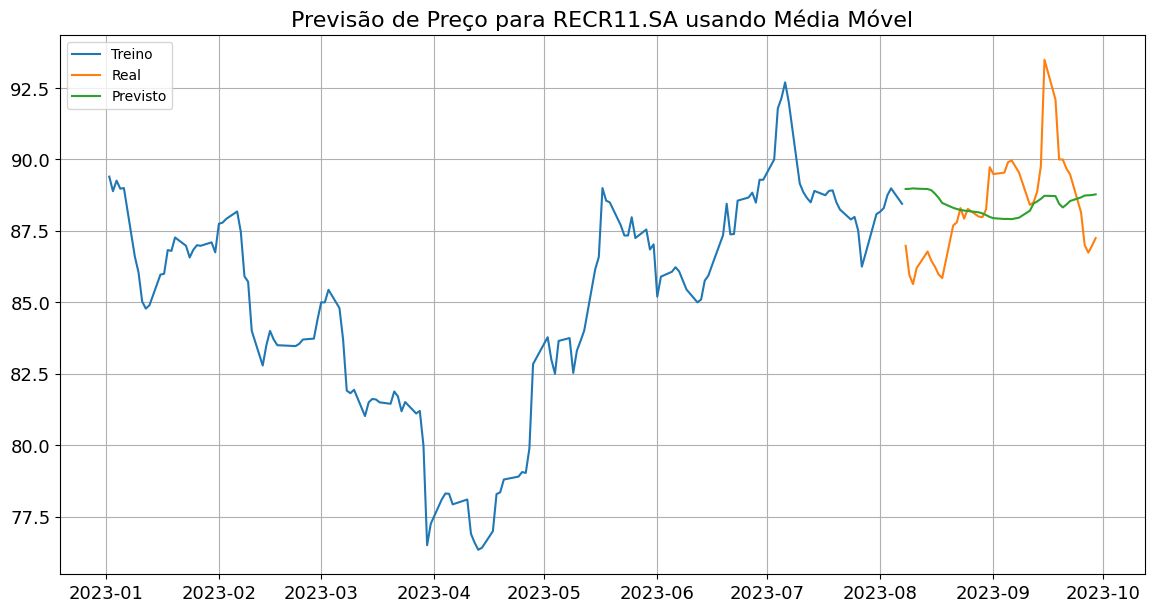

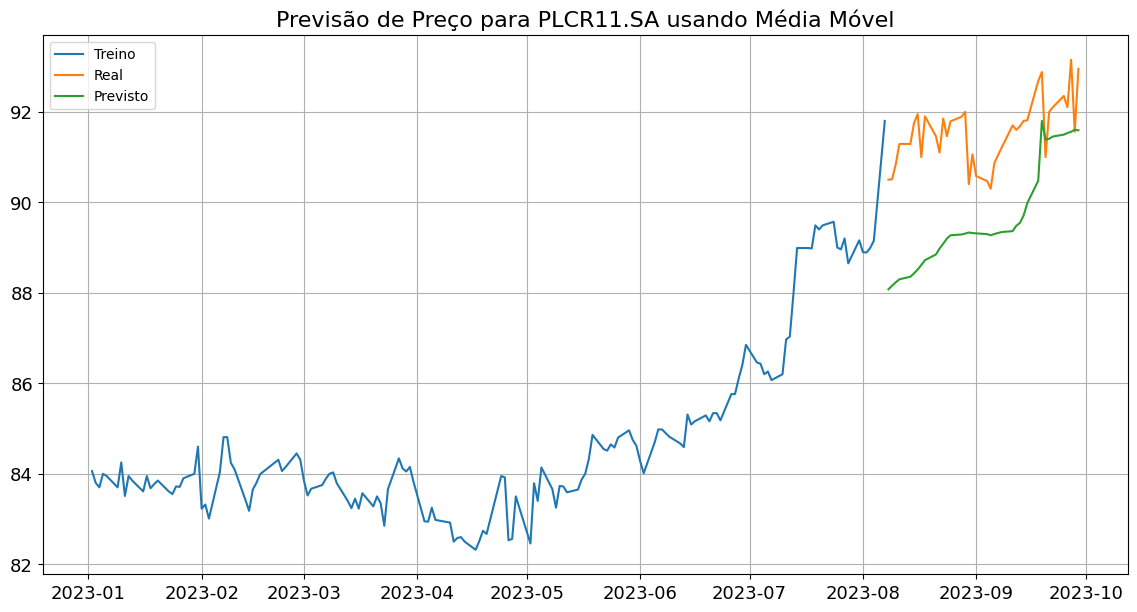

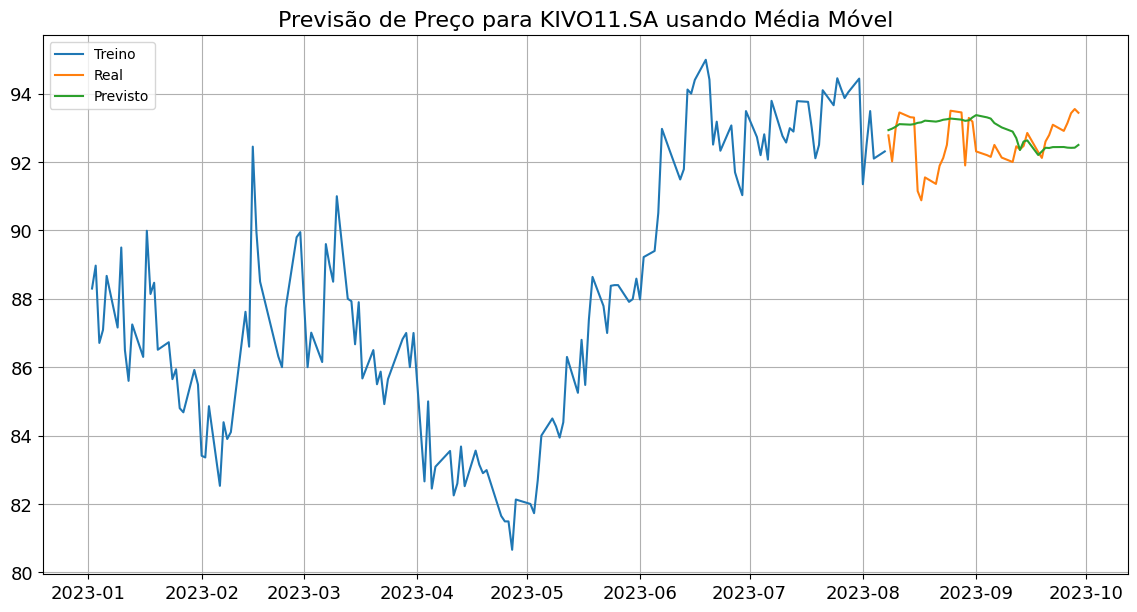

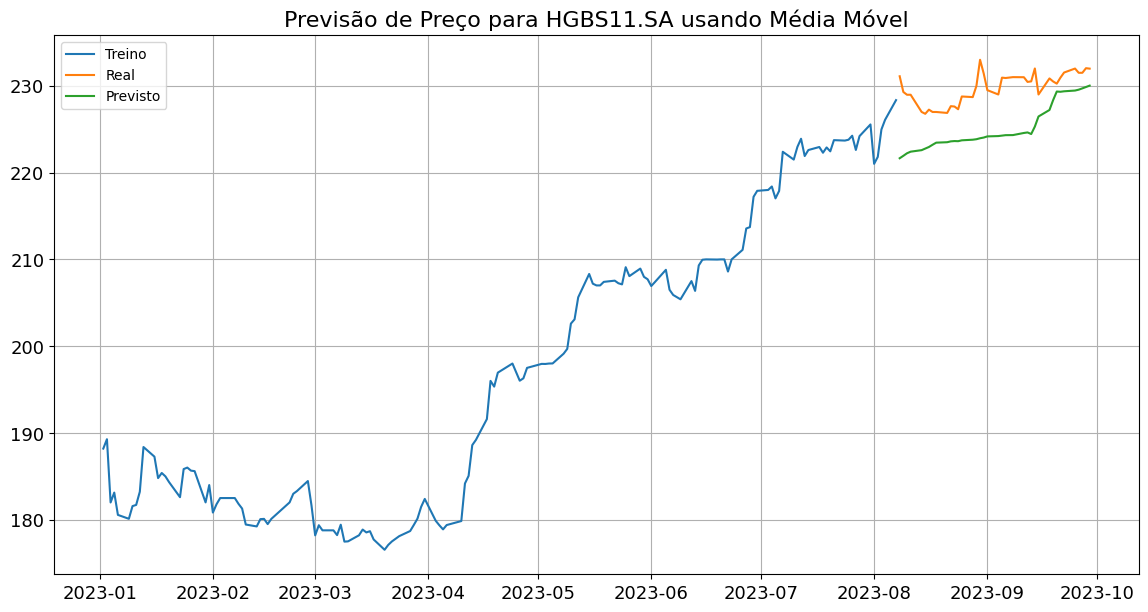

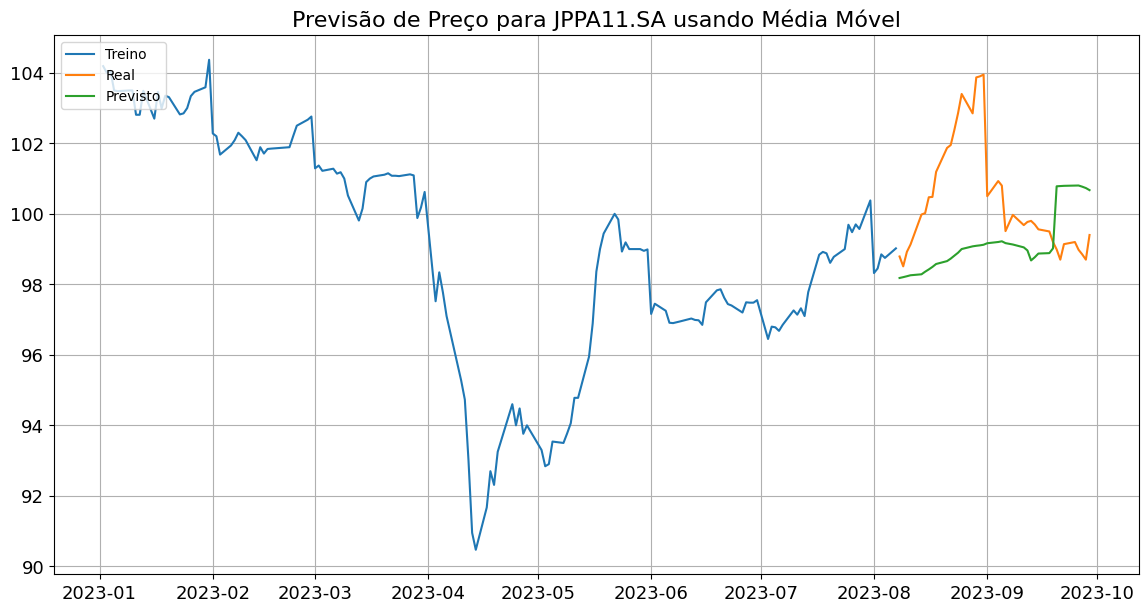

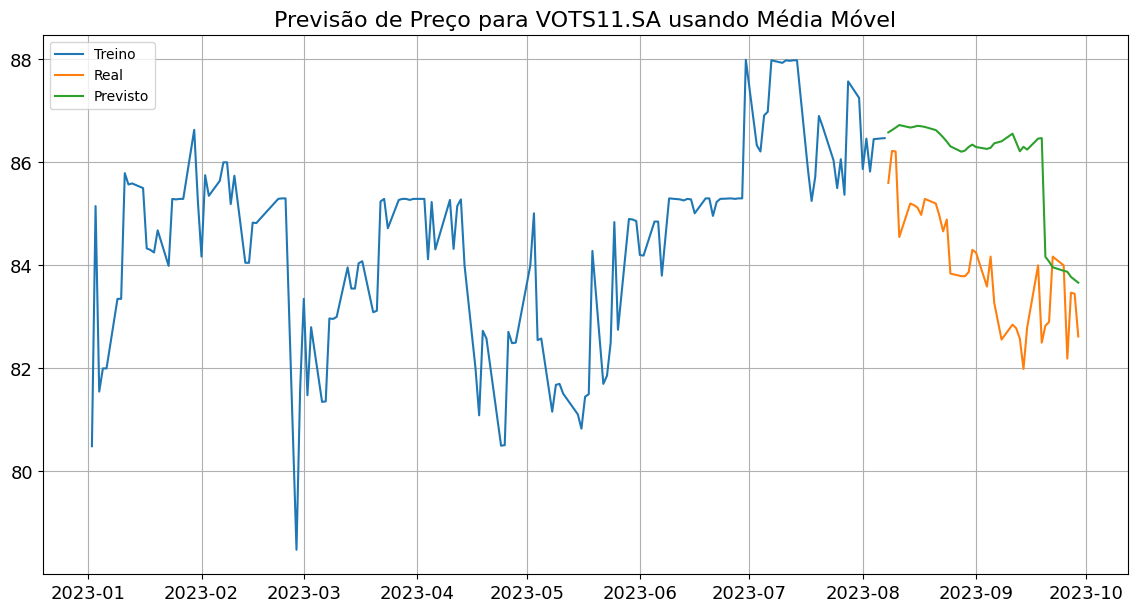

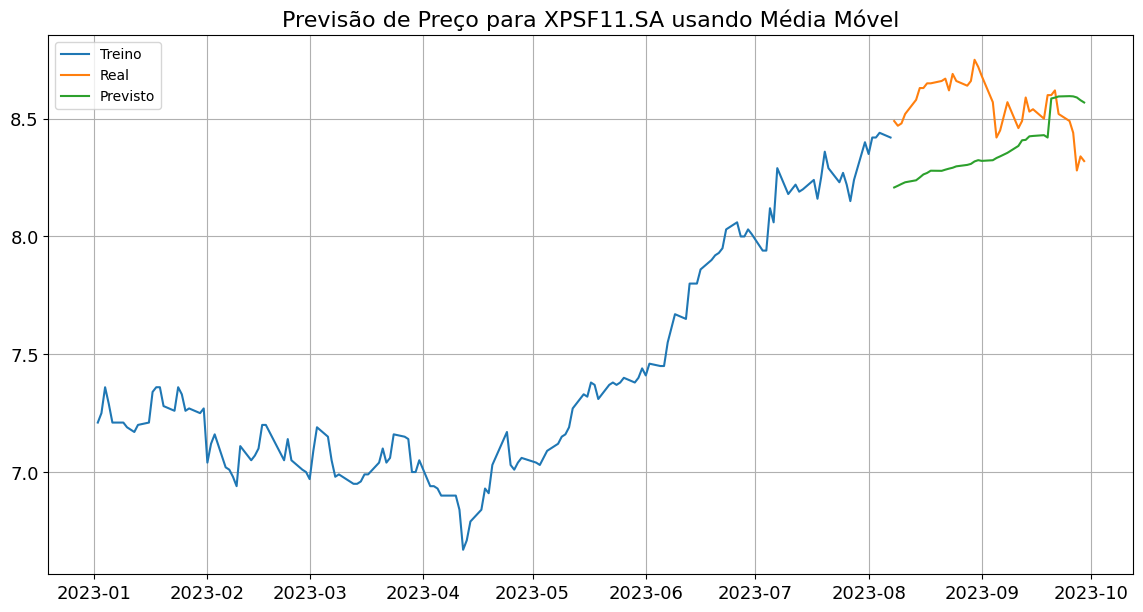

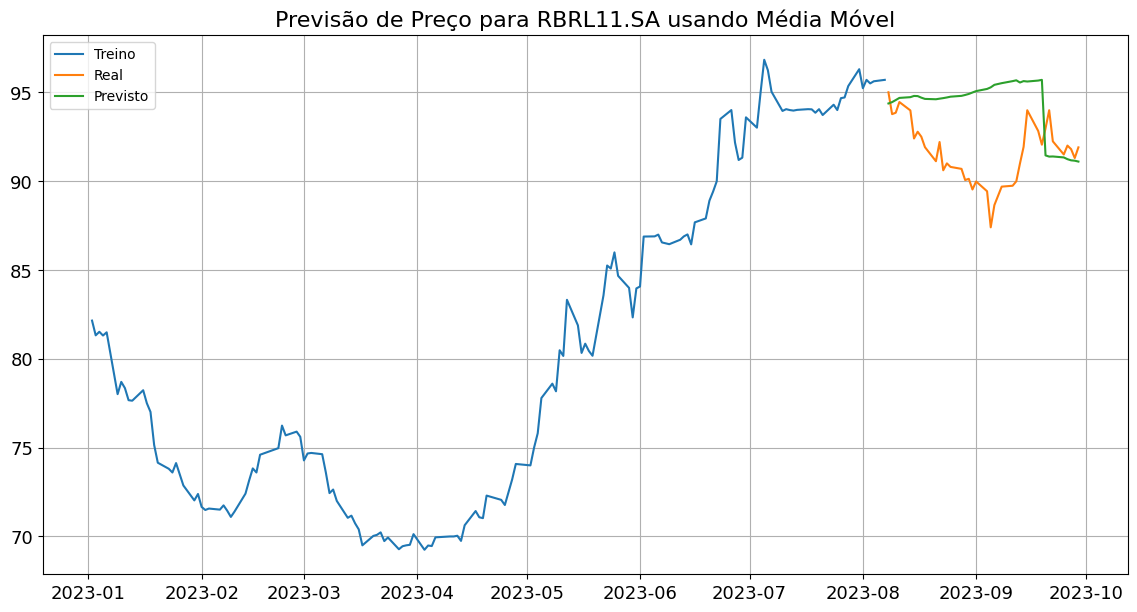

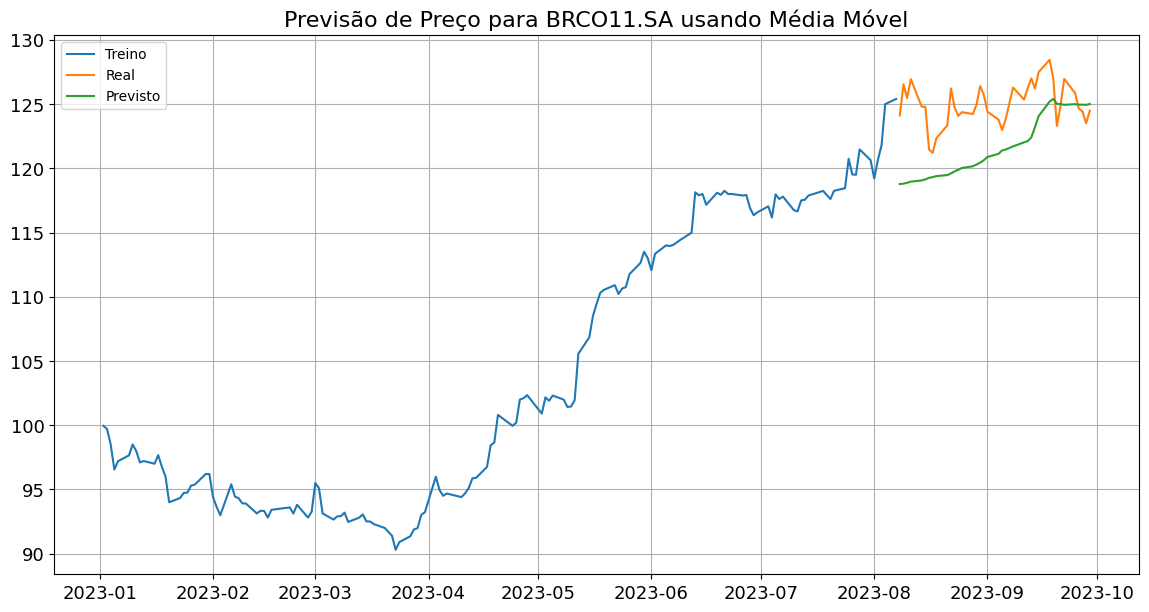

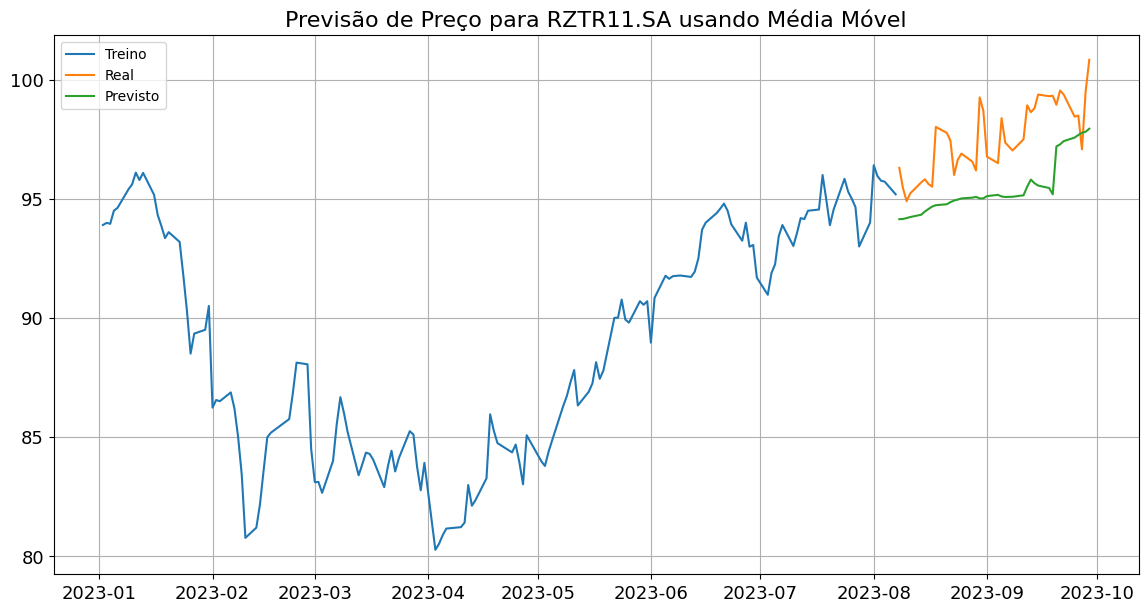

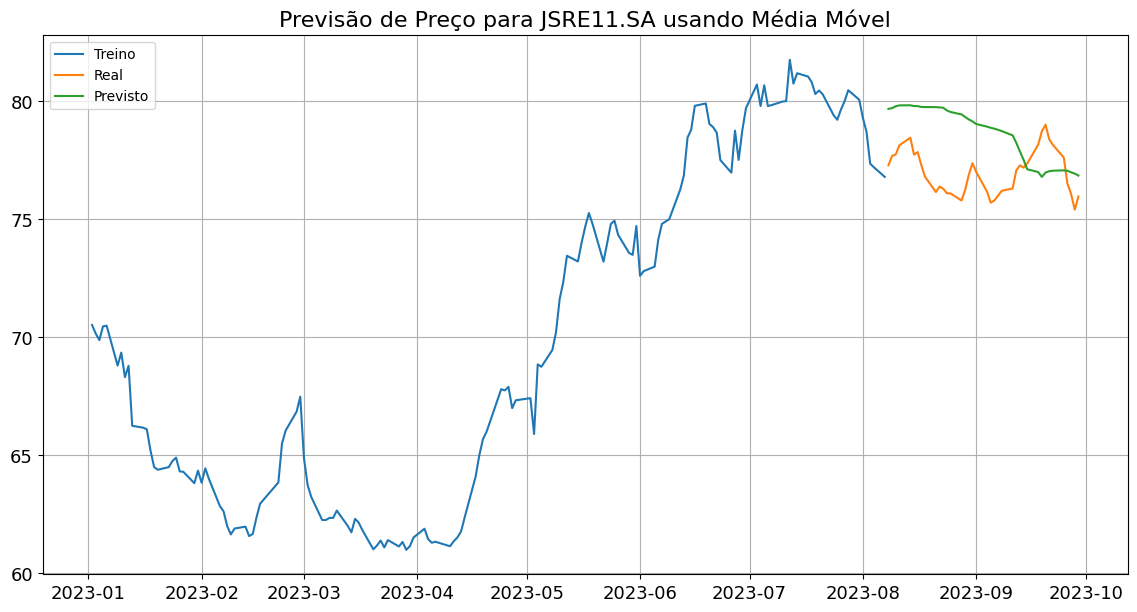

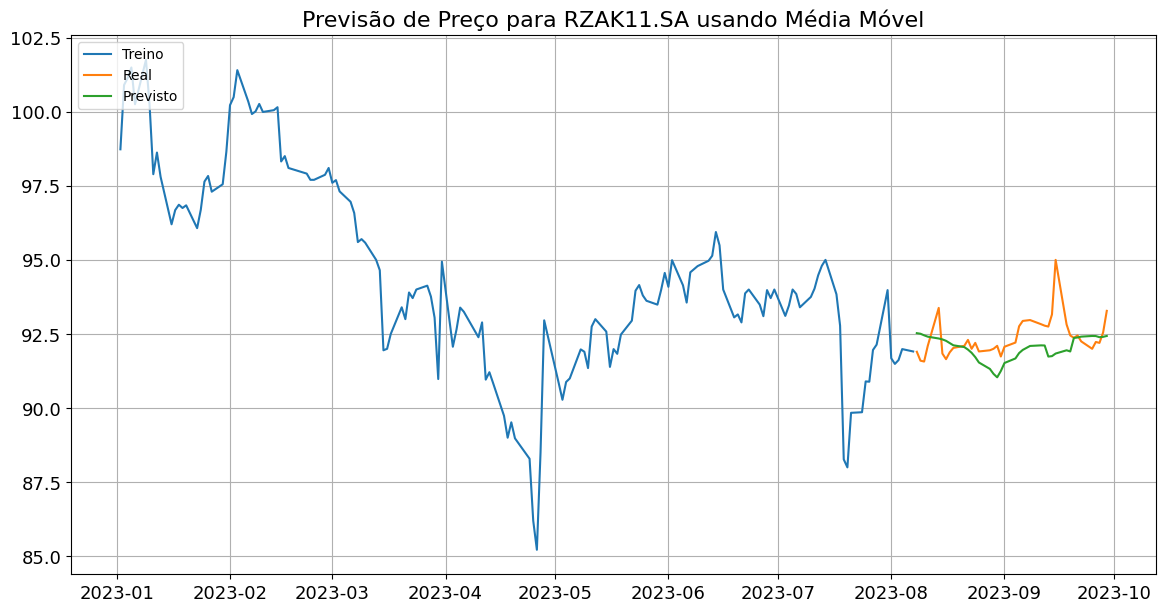

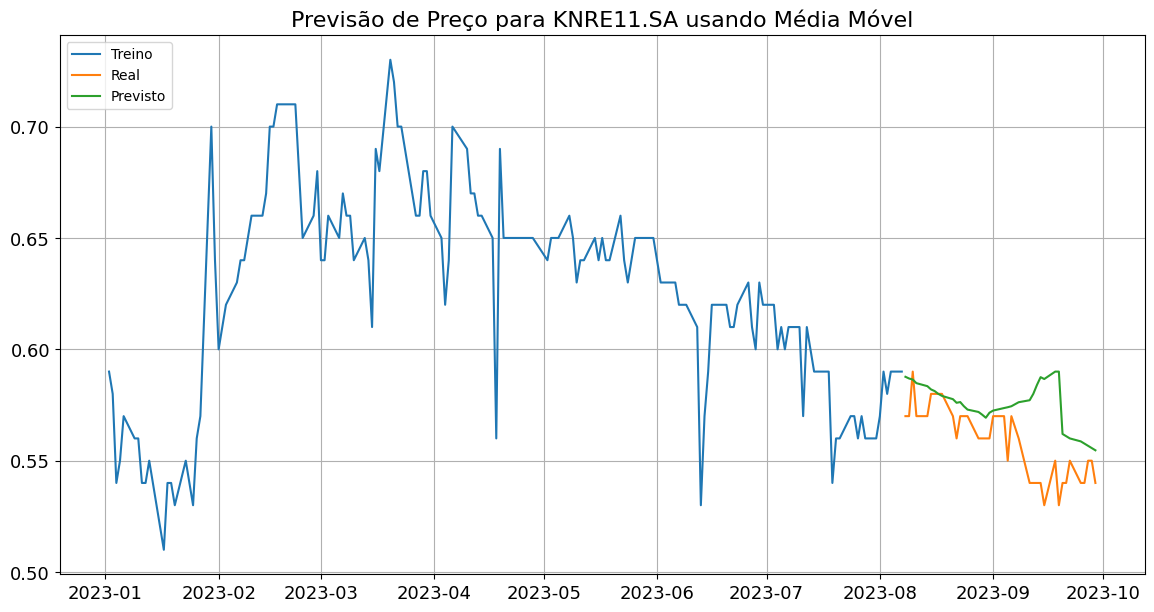

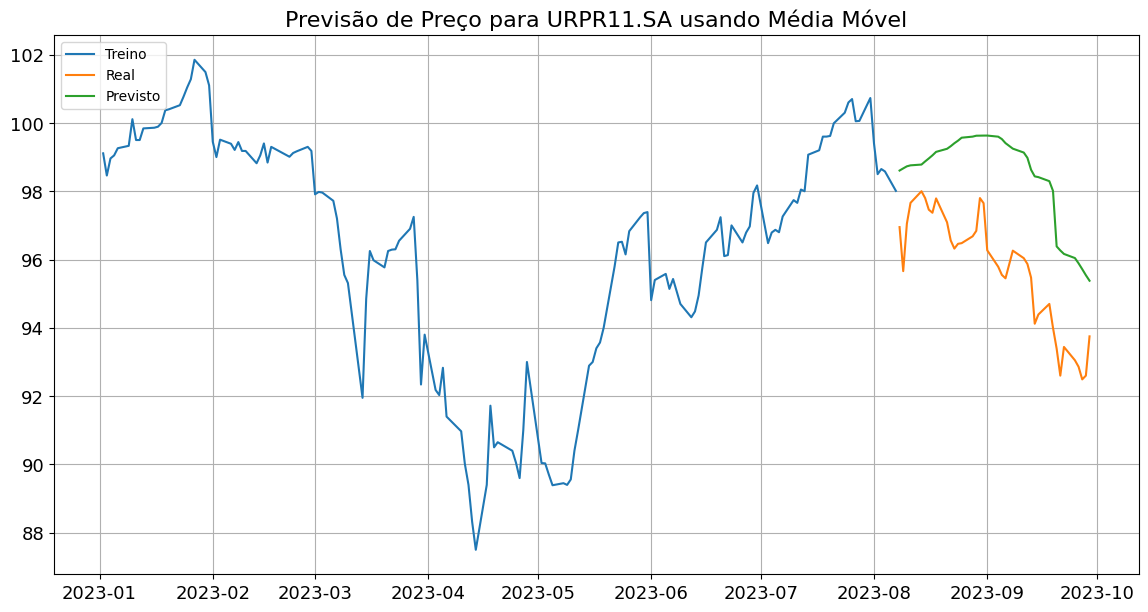

In [46]:
ativos = ['VGIP11.SA', 'RBRF11.SA', 'KFOF11.SA', 'PVBI11.SA', 'MFII11.SA', 'HGCR11.SA', 'RBOP11.SA', 'HABT11.SA', 'TGAR11.SA', 'MGHT11.SA', 'RECR11.SA', 'PLCR11.SA', 'KIVO11.SA', 'HGBS11.SA', 'JPPA11.SA', 'VOTS11.SA', 'XPSF11.SA', 'RBRL11.SA', 'BRCO11.SA', 'RZTR11.SA', 'JSRE11.SA', 'RZAK11.SA', 'KNRE11.SA', 'URPR11.SA']

window = 30

for ativo in ativos:
    data = yf.download(ativo, start="2023-01-01", end="2023-10-02")

    train_size = int(len(data) * 0.8)
    train = data['Close'][:train_size]
    test = data['Close'][train_size:]

    predictions = []

    for t in range(len(test)):
        if t < window:
            predictions.append(train[-(window-t):].mean())
        else:
            predictions.append(test[t-window:t].mean())

    rmse = sqrt(mean_squared_error(test[window:], predictions[window:]))
    print(f'Ativo: {ativo}, RMSE: {rmse}')

    plt.figure(figsize=(14,7))
    plt.plot(train.index, train, label='Treino')
    plt.plot(test.index, test, label='Real')
    plt.plot(test.index, predictions, label='Previsto')
    plt.legend(loc='best')
    plt.title(f"Previsão de Preço para {ativo} usando Média Móvel", fontsize=16)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.legend(loc='upper left')
    plt.grid(True)
    #plt.show()


## Correlação

[********              17%                       ]  4 of 24 completed

[*********************100%***********************]  24 of 24 completed


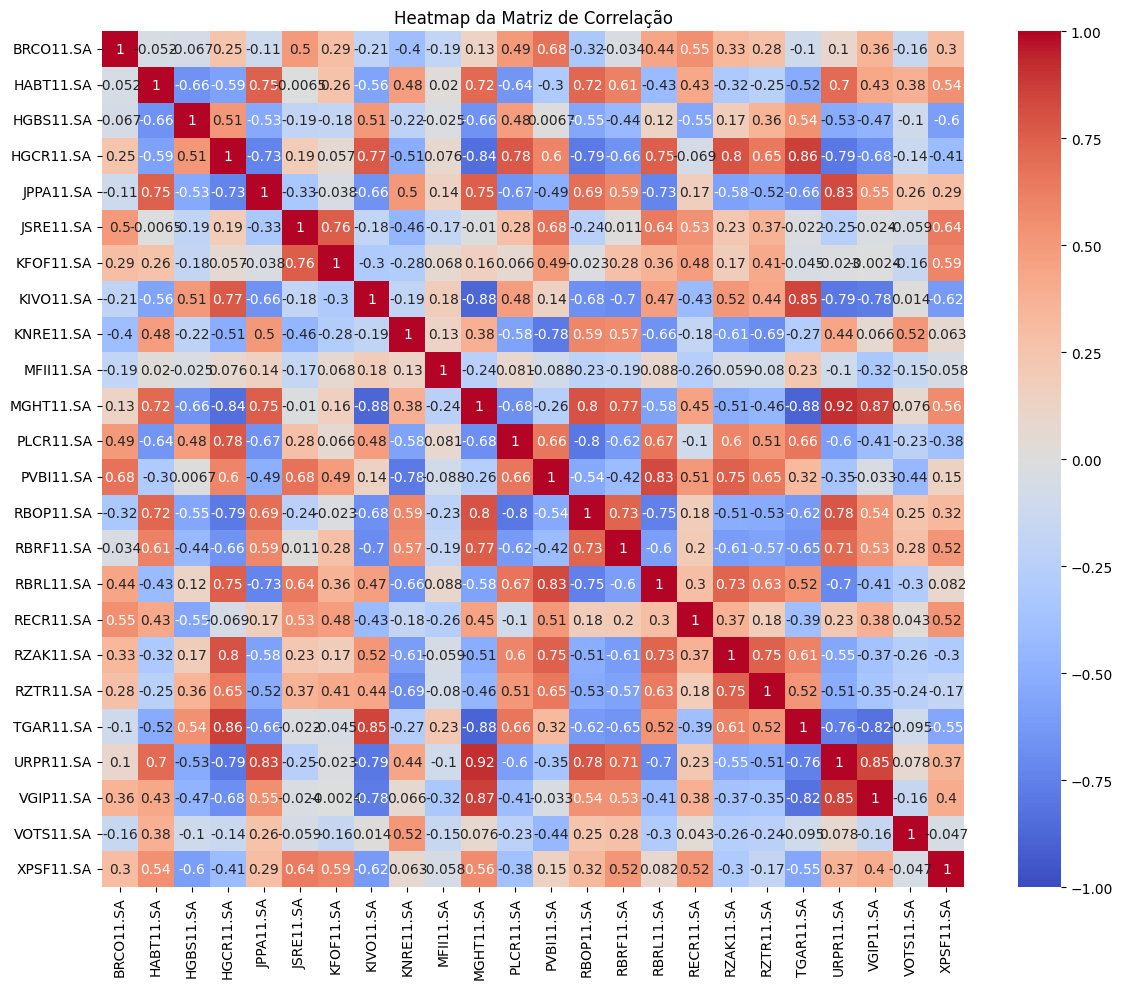

In [85]:
# Lista de ativos
ativos = ['VGIP11.SA', 'RBRF11.SA', 'KFOF11.SA', 'PVBI11.SA', 'MFII11.SA', 'HGCR11.SA', 'RBOP11.SA', 'HABT11.SA', 'TGAR11.SA', 'MGHT11.SA', 'RECR11.SA', 'PLCR11.SA', 'KIVO11.SA', 'HGBS11.SA', 'JPPA11.SA', 'VOTS11.SA', 'XPSF11.SA', 'RBRL11.SA', 'BRCO11.SA', 'RZTR11.SA', 'JSRE11.SA', 'RZAK11.SA', 'KNRE11.SA', 'URPR11.SA']

# Baixar cotações de setembro de 2023
data = yf.download(ativos, start="2023-09-01", end="2023-10-02")['Adj Close']

# Análise da Correlação
matriz_correl = data.corr()

plt.figure(figsize=(12, 10))

# Heatmap da matriz de correlação
sns.heatmap(matriz_correl, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap da Matriz de Correlação')
plt.tight_layout()
plt.show()

## Cluster

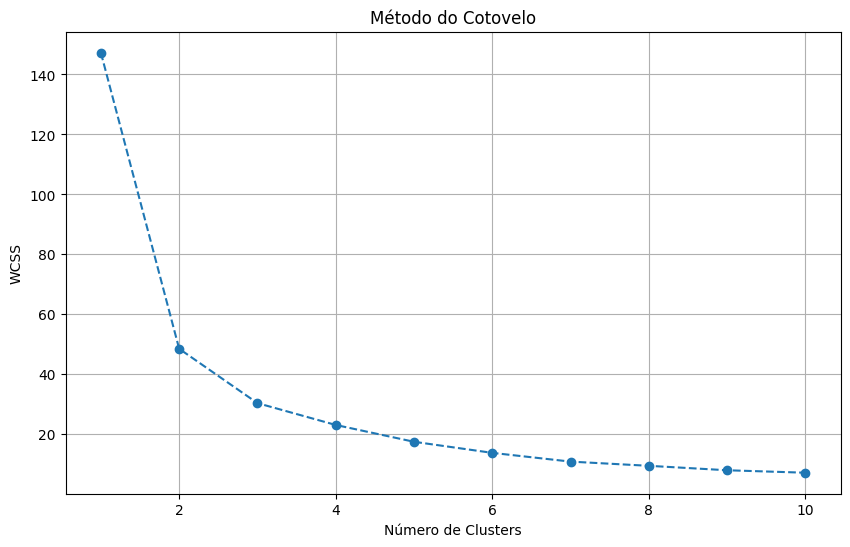

In [86]:
ativos = ['VGIP11.SA', 'RBRF11.SA', 'KFOF11.SA', 'PVBI11.SA', 'MFII11.SA', 'HGCR11.SA', 'RBOP11.SA', 'HABT11.SA', 'TGAR11.SA', 'MGHT11.SA', 'RECR11.SA', 'PLCR11.SA', 'KIVO11.SA', 'HGBS11.SA', 'JPPA11.SA', 'VOTS11.SA', 'XPSF11.SA', 'RBRL11.SA', 'BRCO11.SA', 'RZTR11.SA', 'JSRE11.SA', 'RZAK11.SA', 'KNRE11.SA', 'URPR11.SA']

# Calcular WCSS para diferentes números de clusters
wcss = [] # armazenar uma lista para alocar as distâncias
for i in range(1, 11): # o 11 foi forçado, mas pode mudar.. np-completo... lembre-se
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(matriz_correl)  # Usamos diretamente a matriz de correlação aqui
    wcss.append(kmeans.inertia_) ## resultados do inertia

# Plotar WCSS em relação ao número de clusters
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.grid(True)

plt.show()


In [87]:
# Definir o número de clusters
num_clusters = 5

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=num_clusters)   # Rodar a função para o número de cluster definido
nomes = kmeans.fit_predict(matriz_correl)  # Alocar os tickers pela correlação


matriz_correl_clustered = matriz_correl.copy() # Copiar a matriz de correlação 
matriz_correl_clustered['Cluster'] = nomes # Adicionar nomes como uma nova coluna
matriz_correl_clustered = matriz_correl_clustered.sort_values('Cluster') # Ordenar as linhas pelos clusters

# Criar um DataFrame com os clusters
df_clusters = pd.DataFrame({
    'Ticker': matriz_correl.index,
    'Cluster': nomes
})

# Ordenar os clusters
df_clusters = df_clusters.sort_values(by='Cluster')
print(df_clusters)


       Ticker  Cluster
1   HABT11.SA        0
21  VGIP11.SA        0
4   JPPA11.SA        0
20  URPR11.SA        0
10  MGHT11.SA        0
14  RBRF11.SA        0
13  RBOP11.SA        0
11  PLCR11.SA        1
3   HGCR11.SA        1
18  RZTR11.SA        1
17  RZAK11.SA        1
15  RBRL11.SA        1
12  PVBI11.SA        1
16  RECR11.SA        2
0   BRCO11.SA        2
6   KFOF11.SA        2
5   JSRE11.SA        2
23  XPSF11.SA        2
7   KIVO11.SA        3
19  TGAR11.SA        3
2   HGBS11.SA        3
9   MFII11.SA        4
8   KNRE11.SA        4
22  VOTS11.SA        4


c:\Users\tatia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



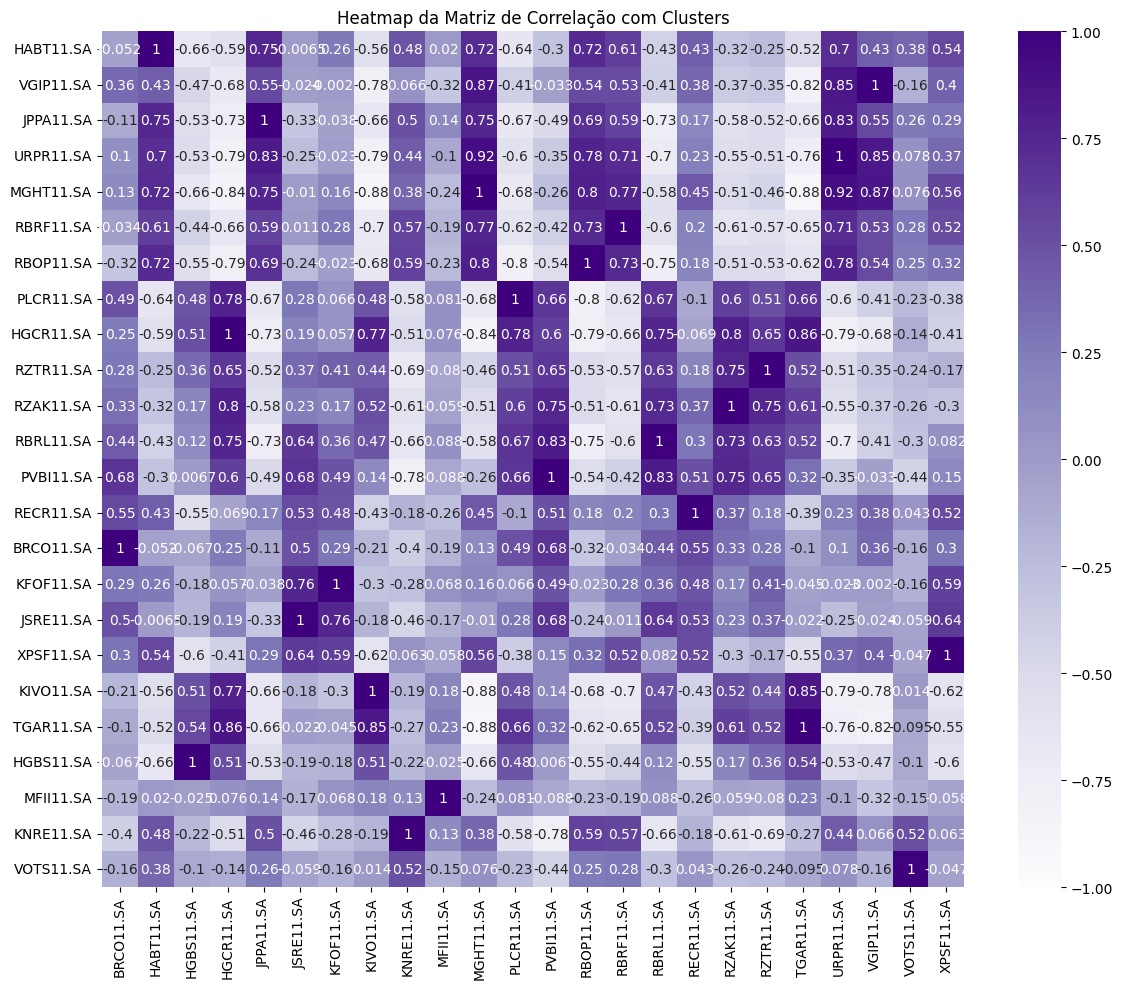

In [88]:
# Heatmap da Matriz de Correlação com Clusters
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correl_clustered.drop('Cluster', axis=1), annot=True, cmap='Purples', vmin=-1, vmax=1, yticklabels=matriz_correl_clustered.index)
plt.title('Heatmap da Matriz de Correlação com Clusters')
plt.tight_layout()
plt.show()

In [89]:
# Calcular os retornos diários e eliminar os valores ausentes
retorno = data.pct_change().dropna() # pct_change calcula os retornos percentuais diários
# Calcular o retorno acumulado
retorno_acumulado = (1 + retorno).cumprod()  
# Último valor do retorno acumulado
final_retorno_acumulado = retorno_acumulado.iloc[-1]

# Juntar os ativos com o retorno acumulado
df_combinado = pd.concat([df_clusters.set_index('Ticker'), final_retorno_acumulado], axis=1)
# Renomear as colunas
df_combinado.columns = ['Cluster', 'Retorno Acumulado']
# Ordenar os clusters
unique_clusters = df_clusters['Cluster'].unique() 

# Selecionar em cada cluster o ativo com maior retorno acumulado
tickers_selecionados = []
for cluster in unique_clusters:
    ticker = df_combinado[df_combinado['Cluster'] == cluster]['Retorno Acumulado'].idxmax()
    tickers_selecionados.append(ticker)

print("Fundos com maior retorno acumulado de cada cluster:")
for ticker in tickers_selecionados:
    print(ticker)


Fundos com maior retorno acumulado de cada cluster:
JPPA11.SA
RZTR11.SA
KFOF11.SA
TGAR11.SA
MFII11.SA


In [92]:
# Converter as listas em conjuntos para facilitar a interseção
tickers_selecionados_set = set(tickers_selecionados)
df_candles_alta_set = set(fundos_candle_alta['Ativo'].tolist())
df_rsi_sobrevenda_set = set(df_rsi_sobrevenda['Ativo'].tolist())
fundos_cruzamento_alta_set = set(fundos_cruzamento_alta)
# Encontrar a interseção entre os conjuntos
fundos_em_comum_1 = tickers_selecionados_set.intersection(df_candles_alta_set)
fundos_em_comum_2 = tickers_selecionados_set.intersection(fundos_cruzamento_alta_set)

# Imprimir os fundos que aparecem no Candlestick de Alta e nos ticker selecionados pelo K-Means
print('Fundos nos tickers selecionados pelo K-Means:')
print(tickers_selecionados)
print("\n Fundos que aparecem no Candlestick de Alta e nos ticker selecionados pelo K-Means:")
print(list(fundos_em_comum_1))
print("\nFundo(s) que aparecem no MACD cruzamento de alta e nos ticker selecionados pelo K-Means:")
print(list(fundos_em_comum_2))


Fundos nos tickers selecionados pelo K-Means:
['JPPA11.SA', 'RZTR11.SA', 'KFOF11.SA', 'TGAR11.SA', 'MFII11.SA']

 Fundos que aparecem no Candlestick de Alta e nos ticker selecionados pelo K-Means:
['RZTR11.SA', 'KFOF11.SA', 'TGAR11.SA', 'MFII11.SA', 'JPPA11.SA']

Fundo(s) que aparecem no MACD cruzamento de alta e nos ticker selecionados pelo K-Means:
['TGAR11.SA', 'MFII11.SA', 'RZTR11.SA']


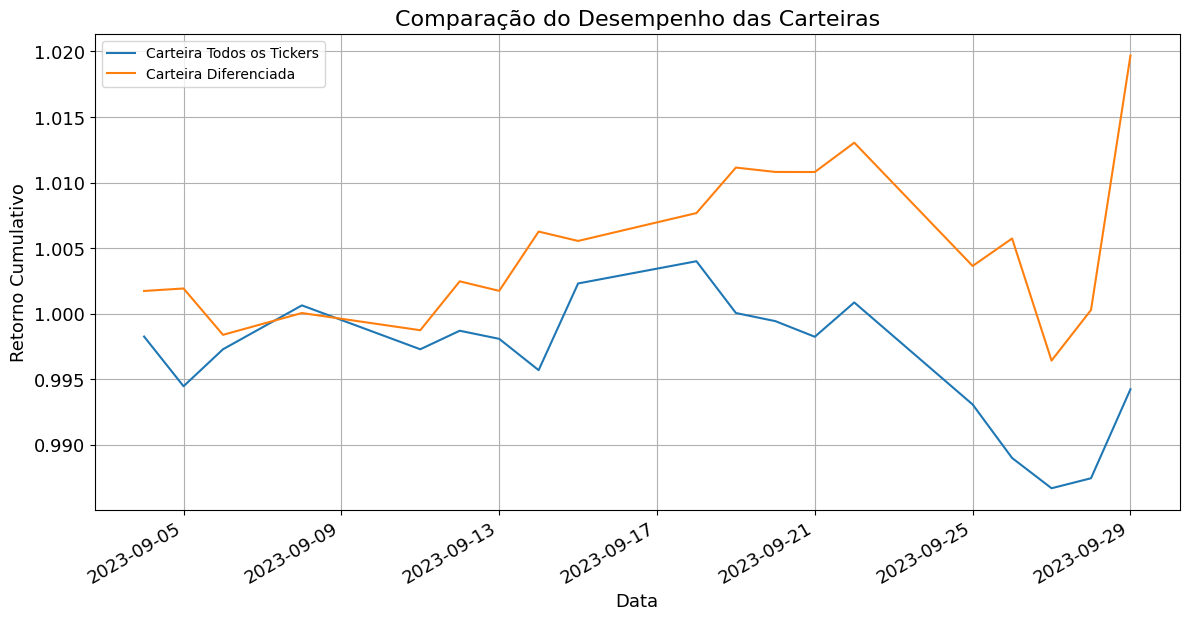

In [93]:
# Calcular o retorno da carteira com todos os ativos
portfolio = data.pct_change().dropna().mean(axis=1)

# Calcular o retorno da carteira com os ativos com maior retorno 
dados_selecionados = data[tickers_selecionados]
weights = [1/len(tickers_selecionados)] * len(tickers_selecionados) #peso na carteira
portfolio_selecionado = dados_selecionados.pct_change().dropna().dot(weights) # o dot multiplica o valor do retorno pelo peso na carteira

# Calcular o retorno acumulado
retorno_acumulado_all = (1 + portfolio).cumprod()
retorno_acumulado_selected = (1 + portfolio_selecionado).cumprod()

# Plotar o retorno acumulado
plt.figure(figsize=(14, 7))
retorno_acumulado_all.plot(label="Carteira Todos os Tickers", legend=True)
retorno_acumulado_selected.plot(label="Carteira Diferenciada", legend=True)
plt.title('Comparação do Desempenho das Carteiras', fontsize=16)
plt.ylabel('Retorno Cumulativo', fontsize=13)
plt.xlabel('Data', fontsize=13)
plt.legend(loc='best')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(True)
plt.show()
